# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Model metrics for evaluation and data splitting
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold

# Visualization for missing data
import missingno as msno

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

Number          Data source Selected Mix number in literature  \
0        NaN       2. Yunusa 2014      NaN                    PC-40   
1        NaN       2. Yunusa 2014      NaN                    PC-50   
2        NaN       2. Yunusa 2014      NaN                    PC-60   
3        NaN       2. Yunusa 2014      NaN                    PC-75   
4        NaN       2. Yunusa 2014      NaN                    FA-40   
...      ...                  ...      ...                      ...   
1983     NaN  J48. Farahani, 2015      NaN                     W3-4   
1984     NaN  J48. Farahani, 2015      NaN                     W4-1   
1985     NaN  J48. Farahani, 2015      NaN                     W4-2   
1986     NaN  J48. Farahani, 2015      NaN                     W4-3   
1987     NaN  J48. Farahani, 2015      NaN                     W4-4   

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                               450.000       
1                                               400.000       
2                                               350.000       
3                                               300.000       
4                                               315.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
0                                0.000                             0.000   
1                                0.000                             0.000   
2                                0.000                             0.000   
3                                0.000                             0.000   
4                                0.000                           135.000   
...                                ...                               ...   
1983                             0.000                             0.000   
1984                             0.000                             0.000   
1985                             0.000                             0.000   
1986                             0.000                             0.000   
1987                             0.000        

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

count     mean     std  \
Number                                                0.000      NaN     NaN   
ASTM type 1 ordinary Portland Cement content (k... 1988.000   39.318 106.826   
CEM I 42.5N ordinary Portland Cement content (k... 1988.000   95.567 146.591   
CEM I 52.5N ordinary Portland Cement content (k... 1988.000  147.093 152.375   
Class C Fly ash content (kg/m^3)                   1988.000    6.120  28.792   
Class F Fly ash content (kg/m^3)                   1988.000   35.498  65.745   
Slag content (kg/m^3)                              1988.000   34.630  73.838   
Silica fume content (kg/m^3)                       1988.000    7.593  21.082   
Water content (kg/m^3)                             1988.000  172.241  28.372   
Superplasticizer content (kg/m^3)                  1988.000    2.336   4.726   
Maximum coarse aggregate size (mm)                 1988.000   18.122   3.829   
Coarse aggregate content (kg/m^3)                  1983.000 1005.264 163.278   
Fine aggregate content (kg/m^3)                    1983.000  814.084 142.480   
Curing temperature (Celsius degree)                1980.000   21.535   2.892   
Curing humidity (%)                                1980.000   95.007  12.286   
Curing day                                         1978.000   25.849  23.382   
Annual average CO2 concentration of exposed env... 1107.000    0.039   0.009   
Annual average humidity of exposed environment (%) 1225.000   66.540  10.979   
Annual average temperature of exposed environme... 1428.000   20.540   6.432   
Annual wetting times/rainy days of exposed envi... 1107.000   89.622  55.766   
Annual average precipitation of exposed environ... 1107.000  860.357 584.885   
Slump (mm)                                          820.000  105.310  57.099   
Average 28-day compressive strength (Mpa)          1942.000   51.545  20.912   
Average 28-day split strength (Mpa)                  62.000    3.679   1.114   
Chloride diffusion coefficient (10-12 m2/s)          66.000    5.240   6.095   
Average carbonation coefficient (mm/year^0.5)      1095.000    3.719   2.691   

                                                       min     25%      50%  \
Number                                                 NaN     NaN      NaN   
ASTM type 1 ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 42.5N ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 52.5N ordinary Portland Cement content (k...   0.000   0.000  155.000   
Class C Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Class F Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Slag content (kg/m^3)                                0.000   0.000    0.000   
Silica fume content (kg/m^3)                         0.000   0.000    0.000   
Water content (kg/m^3)                             105.000 153.000  170.000   
Superplasticizer content (kg/m^3)                    0.000   0.000    0.000   
Maximum coarse aggregate size (mm)                   9.500  16.000   20.000   
Coarse aggregate content (kg/m^3)                  276.000 879.000 1015.000   
Fine aggregate content (kg/m^3)                    279.000 696.000  800.000   
Curing temperature (Celsius degree)                 13.000  20.000   20.000   
Curing humidity (%)                                 25.000  95.000  100.000   
Curing day                                           1.000  14.000   28.000   
Annual average CO2 concentration of exposed env...   0.010   0.035    0.040   
Annual average humidity of exposed environment (%)  30.000  65.000   70.000   
Annual average temperature of exposed environme...   6.400  17.000   20.000   
Annual wetting times/rainy days of exposed envi...   0.000  44.000   93.000   
Annual average precipitation of exposed environ...   0.000 214.000 1000.000   
Slump (mm)                                           0.000  70.000  100.000   
Average 28-day compressive strength (Mpa)            5.000  37.500   49.429 

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices = list(range(0, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                               450.000       
1                                               400.000       
2                                               350.000       
3                                               300.000       
4                                               315.000       
...                                                 ...       
1983                                              0.000       
1984                                              0.000       
1985                                              0.000       
1986                                              0.000       
1987                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
0                                0.000                             0.000   
1                                0.000                             0.000   
2                                0.000                             0.000   
3                                0.000                             0.000   
4                                0.000                           135.000   
...                                ...                               ...   
1983                             0.000                             0.000   
1984                             0.000                             0.000   
1985                             0.000                             0.000   
1986                             0.000                             0.000   
1987                             0.000                             0.000   

      Slag content (kg/m^3)  Silica fume content (kg/m^3)  \
0                     0.000                         0.000   
1                     0.000                         0.000   
2                     0.000                         0.000   
3                     0.000                         0.000   
4                     0.000                         0.000   
...                     ...                           ...   
1983                  0.000                        50.000   
1984                  0.000                        20.000   
1985                  0.000                        30.000   
1986                  0.000                        40.000   
1987                  0.000                        50.000   

      Water content (kg/m^3)  Superplasticizer content (kg/m^3)  \
0                    1

In [8]:
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [9]:
semi_df.describe().T

count     mean     std  \
ASTM type 1 ordinary Portland Cement content (k... 1988.000   39.318 106.826   
CEM I 42.5N ordinary Portland Cement content (k... 1988.000   95.567 146.591   
CEM I 52.5N ordinary Portland Cement content (k... 1988.000  147.093 152.375   
Class C Fly ash content (kg/m^3)                   1988.000    6.120  28.792   
Class F Fly ash content (kg/m^3)                   1988.000   35.498  65.745   
Slag content (kg/m^3)                              1988.000   34.630  73.838   
Silica fume content (kg/m^3)                       1988.000    7.593  21.082   
Water content (kg/m^3)                             1988.000  172.241  28.372   
Superplasticizer content (kg/m^3)                  1988.000    2.336   4.726   
Maximum coarse aggregate size (mm)                 1988.000   18.122   3.829   
Coarse aggregate content (kg/m^3)                  1983.000 1005.264 163.278   
Fine aggregate content (kg/m^3)                    1983.000  814.084 142.480   
Curing temperature (Celsius degree)                1980.000   21.535   2.892   
Curing humidity (%)                                1980.000   95.007  12.286   
Curing day                                         1978.000   25.849  23.382   
Slump (mm)                                          820.000  105.310  57.099   
Average 28-day compressive strength (Mpa)          1942.000   51.545  20.912   
Average 28-day split strength (Mpa)                  62.000    3.679   1.114   
Chloride diffusion coefficient (10-12 m2/s)          66.000    5.240   6.095   
Average carbonation coefficient (mm/year^0.5)      1095.000    3.719   2.691   

                                                       min     25%      50%  \
ASTM type 1 ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 42.5N ordinary Portland Cement content (k...   0.000   0.000    0.000   
CEM I 52.5N ordinary Portland Cement content (k...   0.000   0.000  155.000   
Class C Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Class F Fly ash content (kg/m^3)                     0.000   0.000    0.000   
Slag content (kg/m^3)                                0.000   0.000    0.000   
Silica fume content (kg/m^3)                         0.000   0.000    0.000   
Water content (kg/m^3)                             105.000 153.000  170.000   
Superplasticizer content (kg/m^3)                    0.000   0.000    0.000   
Maximum coarse aggregate size (mm)                   9.500  16.000   20.000   
Coarse aggregate content (kg/m^3)                  276.000 879.000 1015.000   
Fine aggregate content (kg/m^3)                    279.000 696.000  800.000   
Curing temperature (Celsius degree)                 13.000  20.000   20.000   
Curing humidity (%)                                 25.000  95.000  100.000   
Curing day                                           1.000  14.000   28.000   
Slump (mm)                                           0.000  70.000  100.000   
Average 28-day compressive strength (Mpa)            5.000  37.500   49.429   
Average 28-day split strength (Mpa)                  0.960   2.910    3.570   
Chloride diffusion coefficient (10-12 m2/s)          0.500   2.094    3.144   
Average carbonation coefficient (mm/year^0.5)        0.000   1.719    3.193   

                                                        75%      max  
ASTM type 1 ordinary Portland Cement content (k...    0.000  702.000  
CEM I 42.5N ordinary Portland Cement content (k...  210.000  547.000  
CEM I 52.5N ordinary Portland Cement content (k...  280.000  660.000  
Class C Fly ash content (kg/m^3)                      0.000  225.000  
Class F Fly ash content (kg/m^3)                     56.500  544.000  
Slag content (kg/m^3)                                 0.000  440.000  
Silica fume content (kg/m^3)                          0.000  150.000  
Water content (kg/m^3)                              186.000  295.000  
Superplasticizer content (kg/m^3)                     2.703   35.100  
Max

# EDA

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Uni-variate

In [12]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` vari

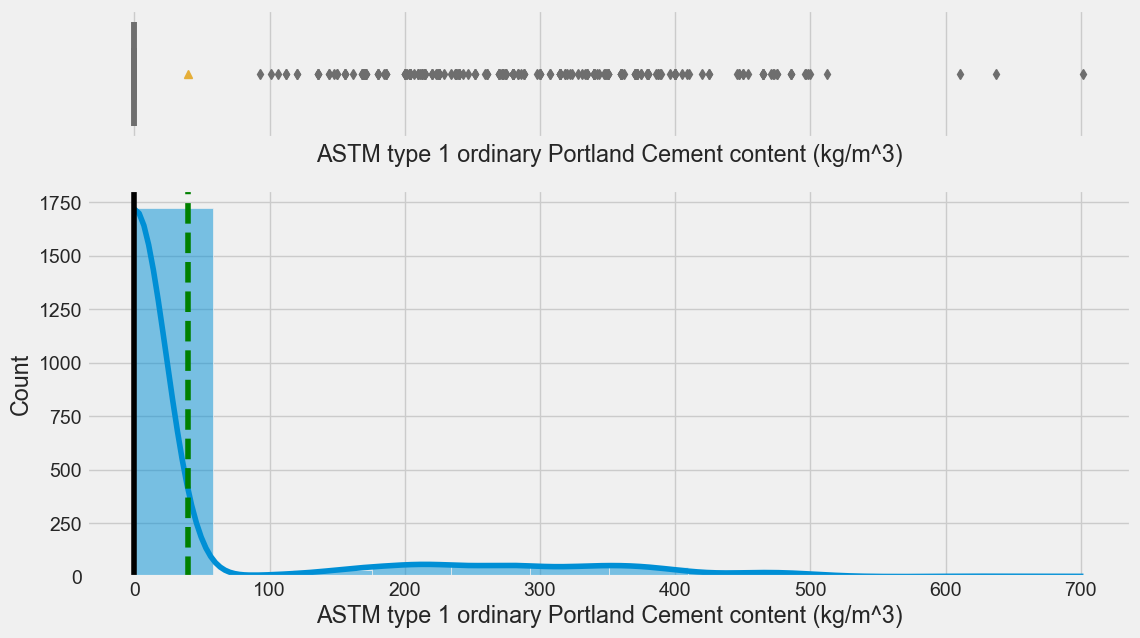

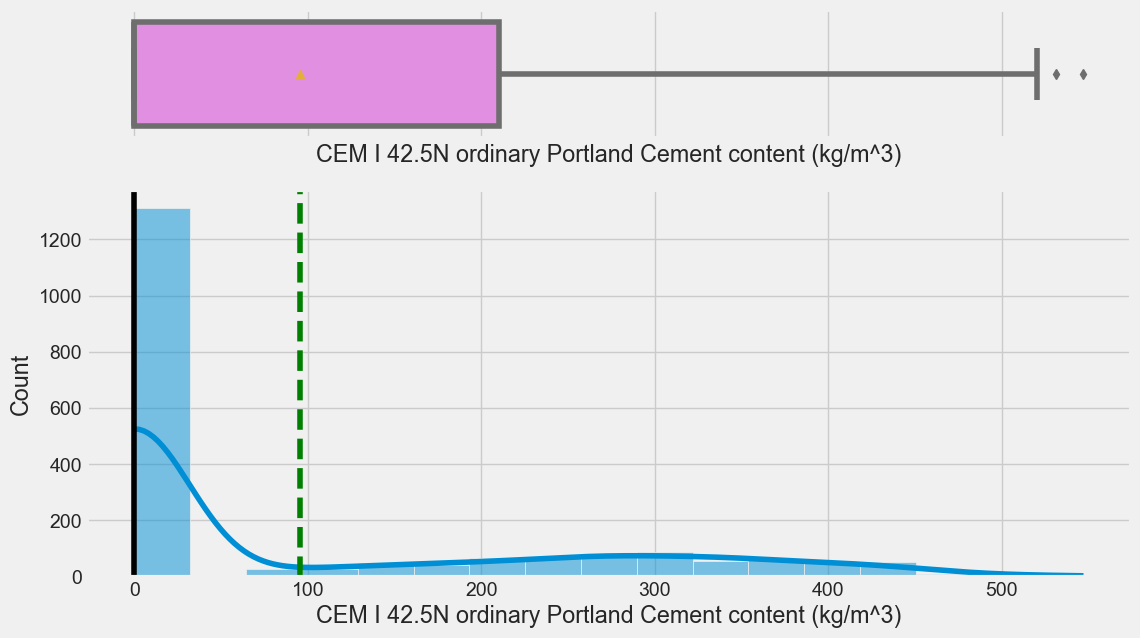

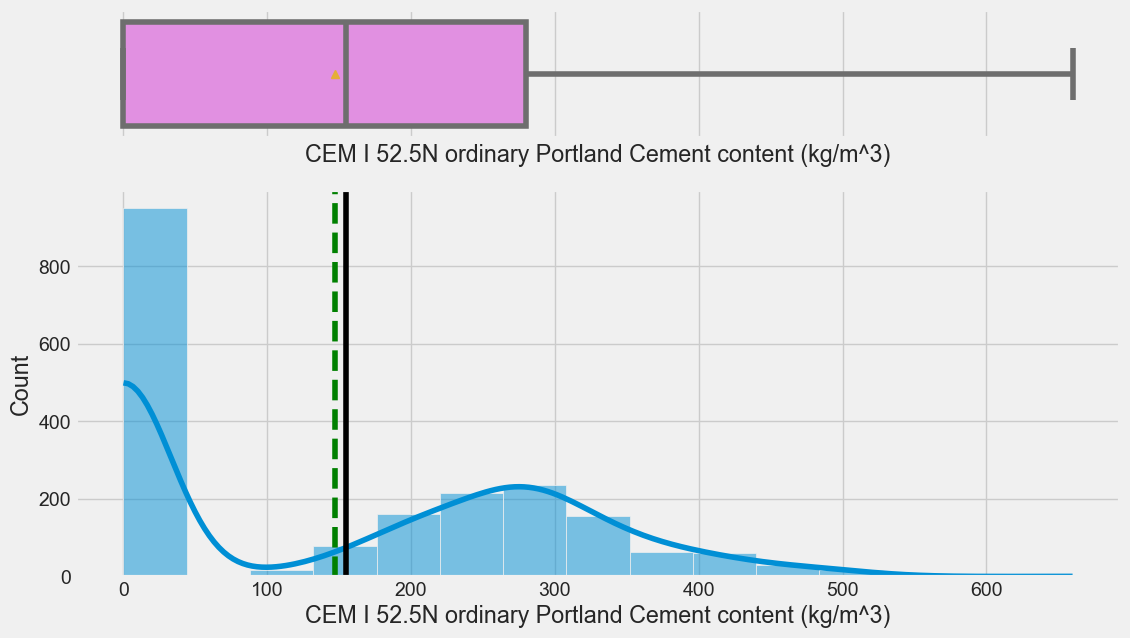

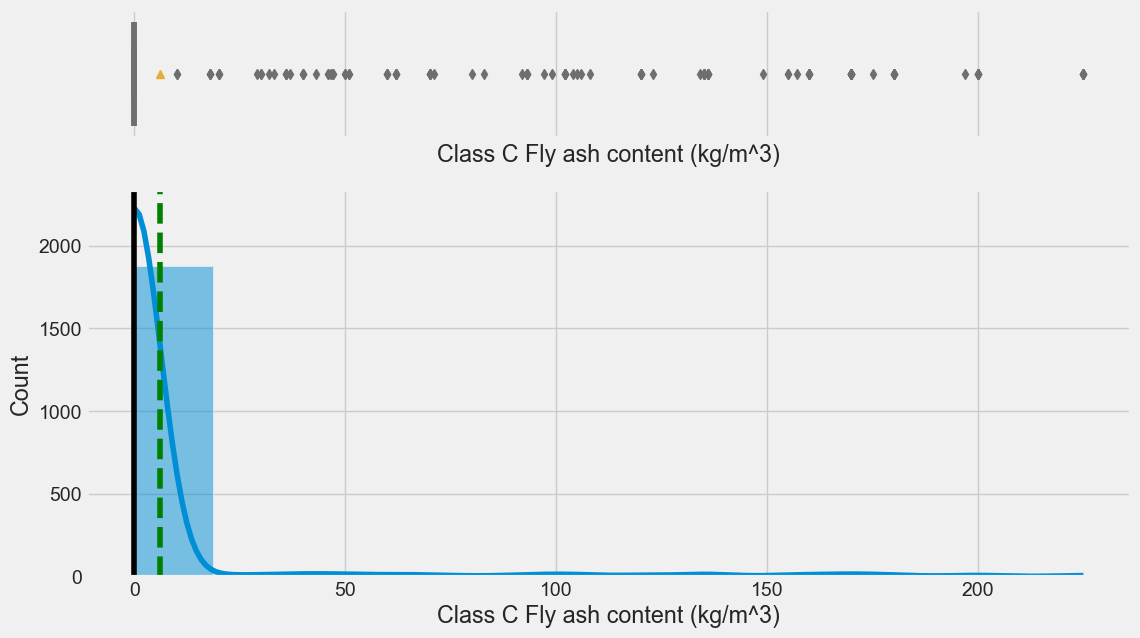

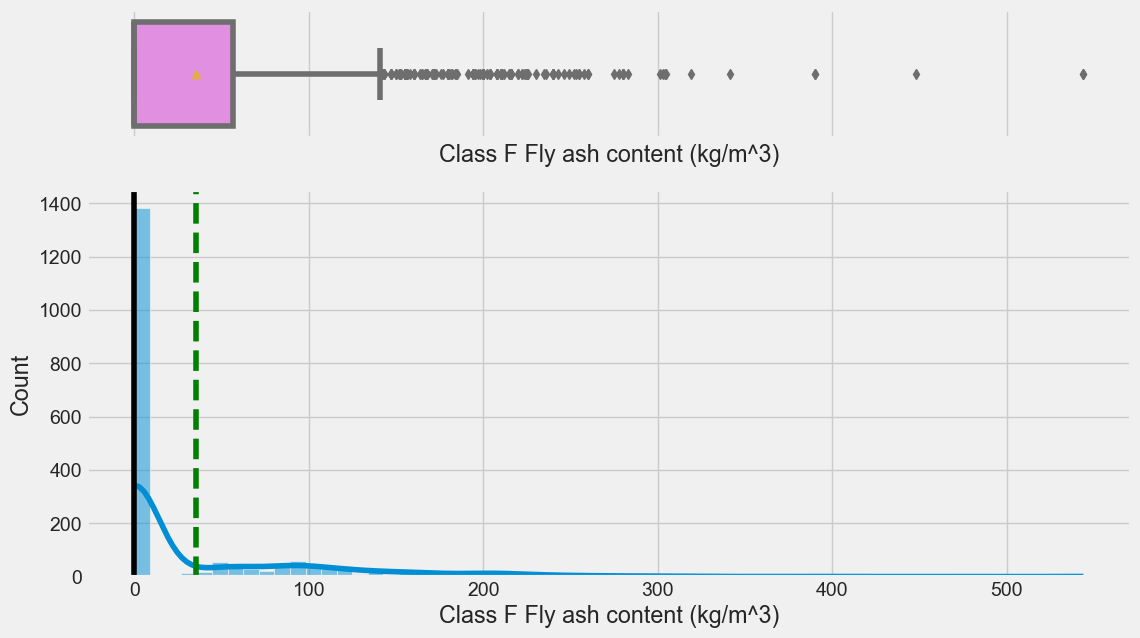

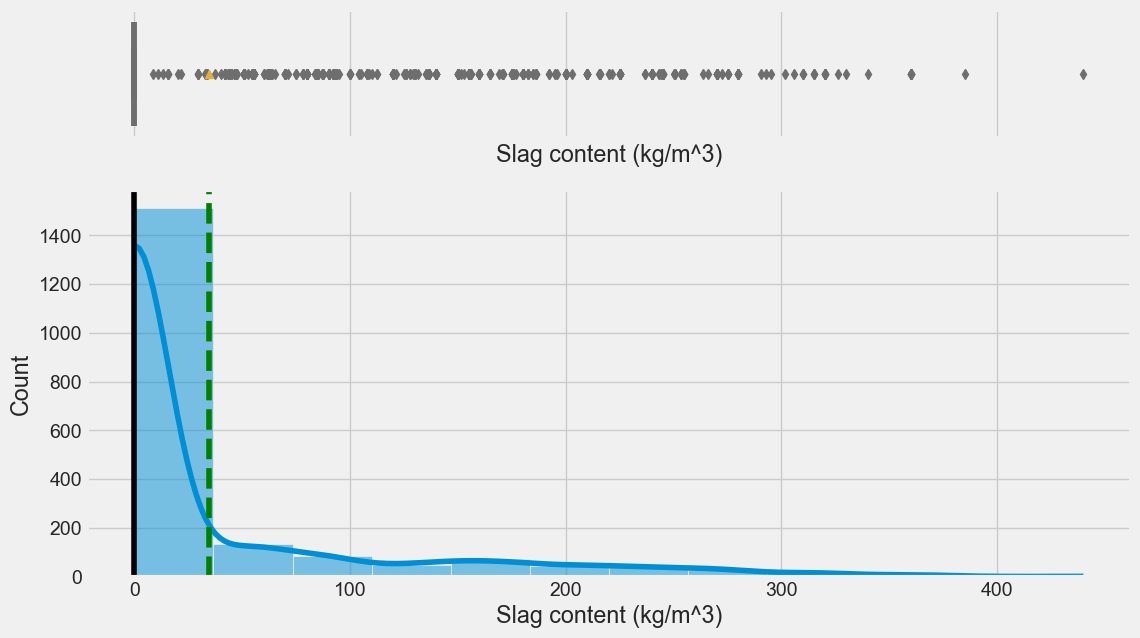

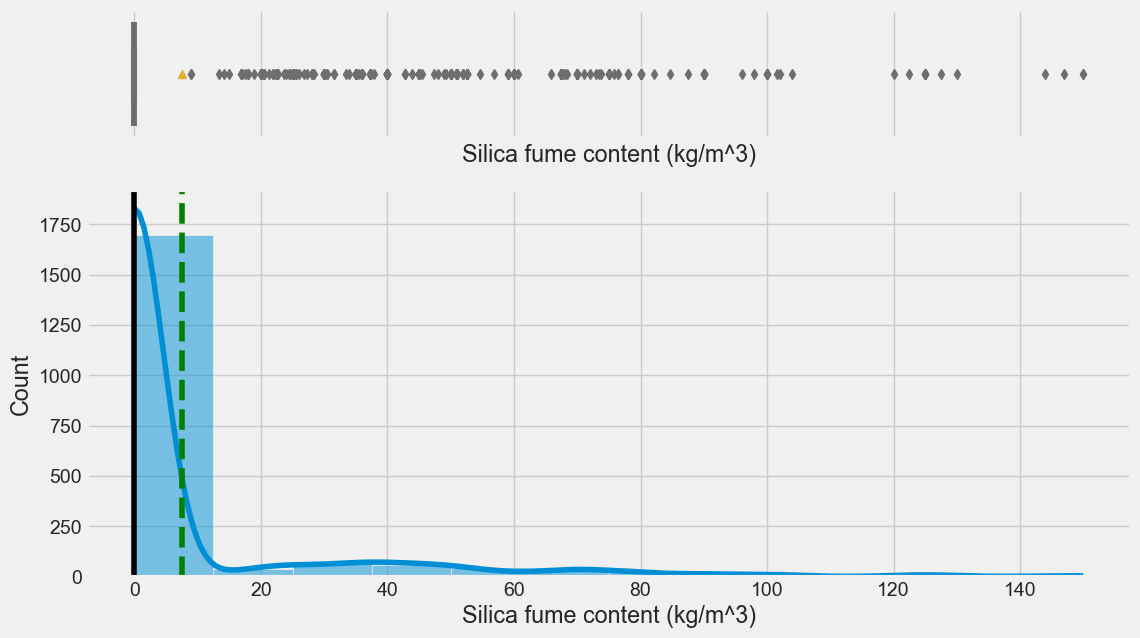

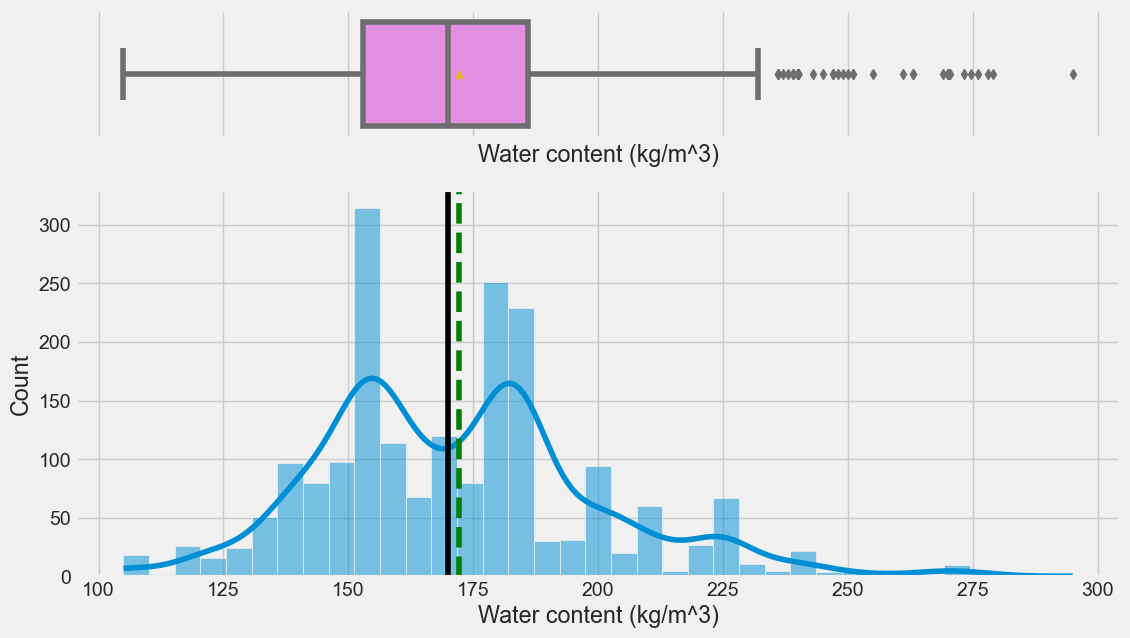

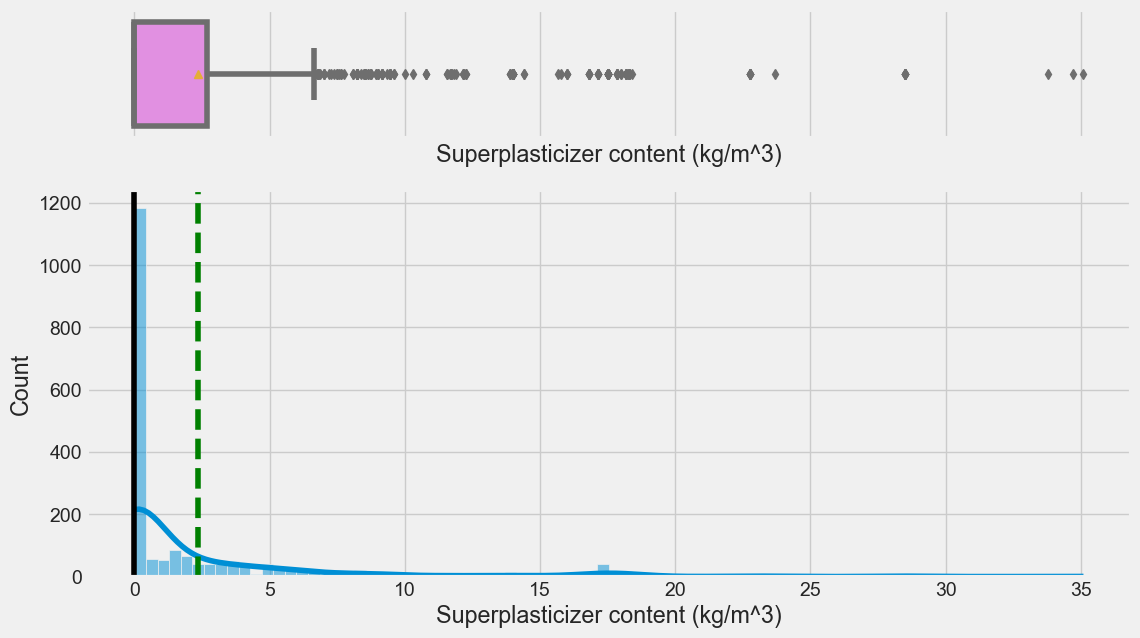

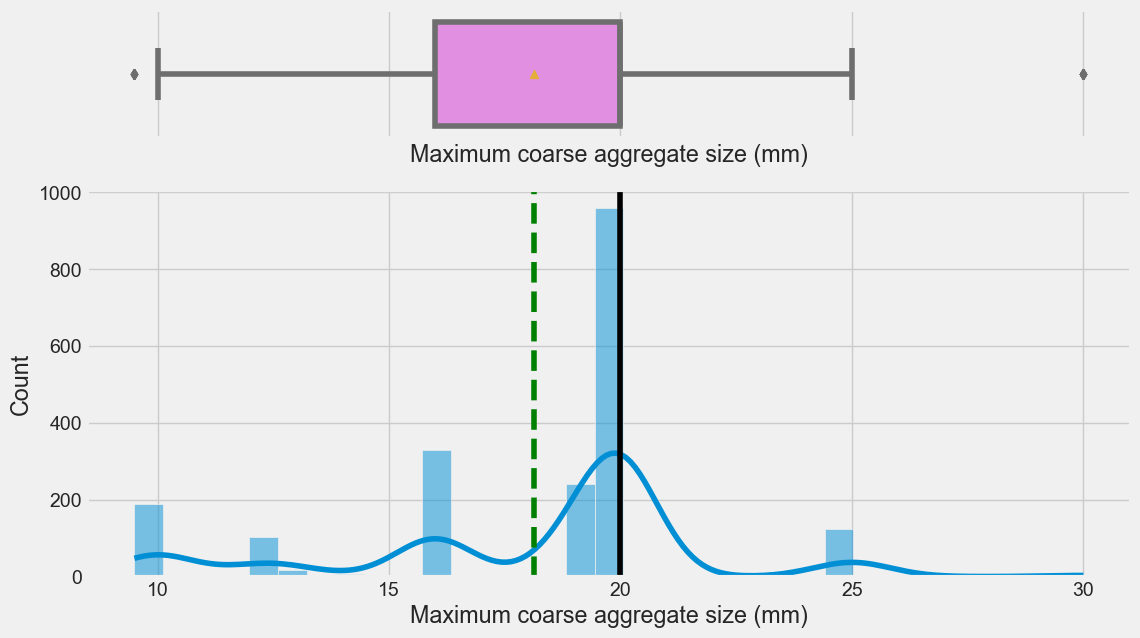

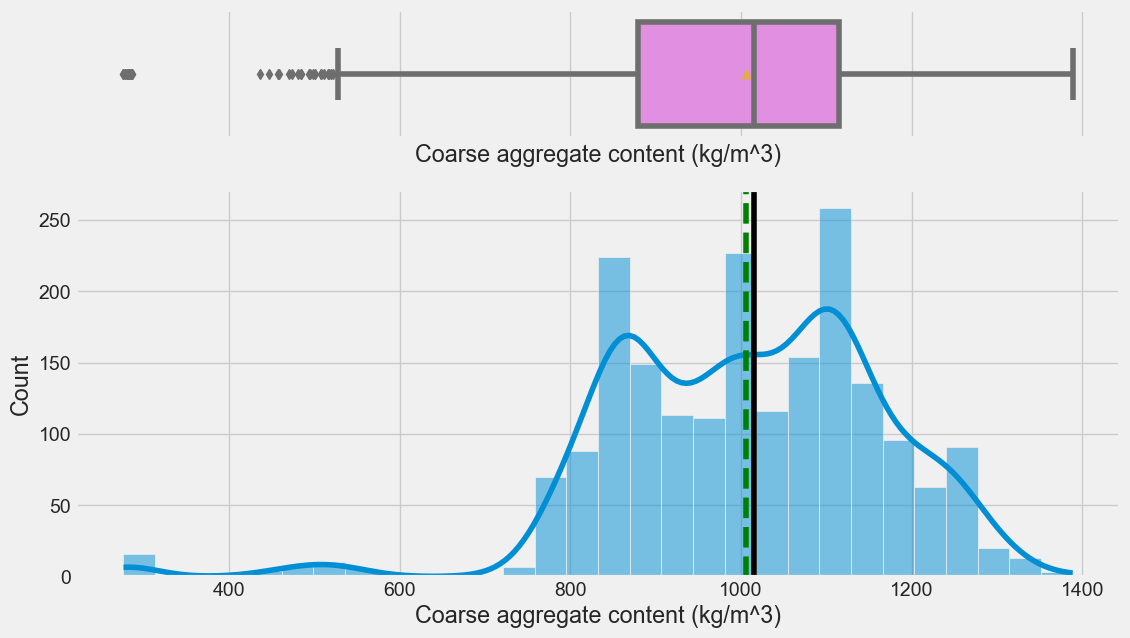

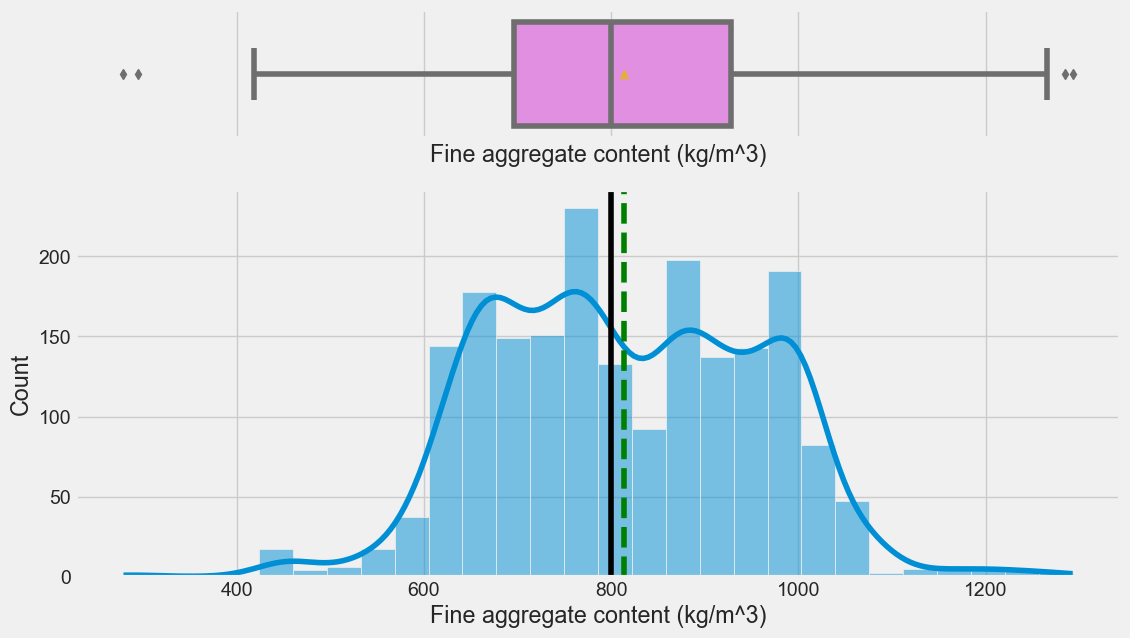

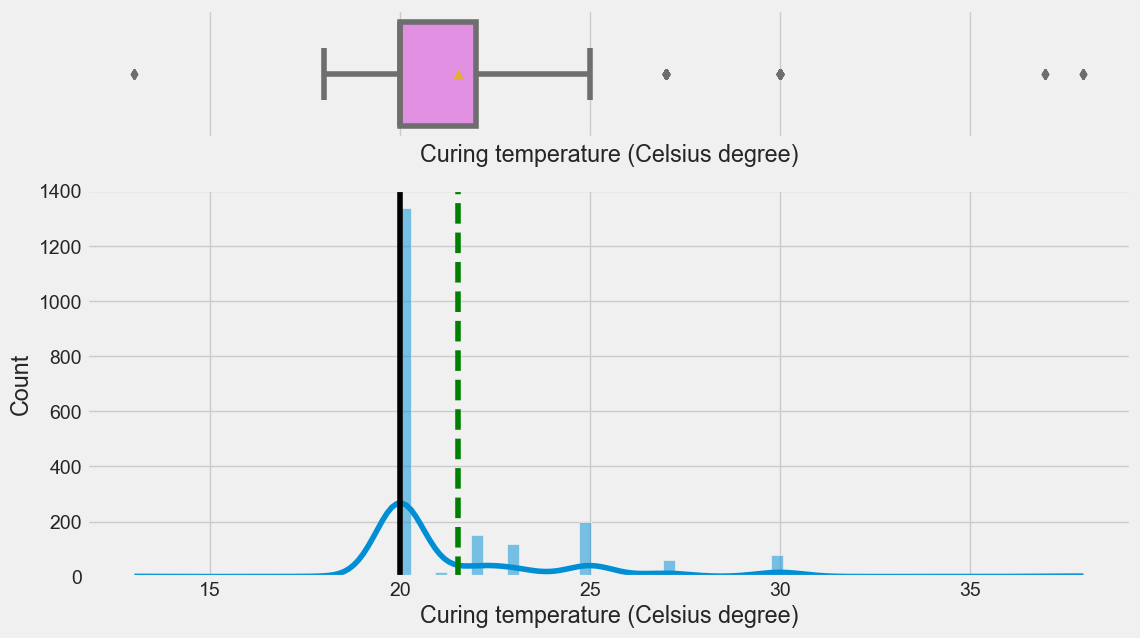

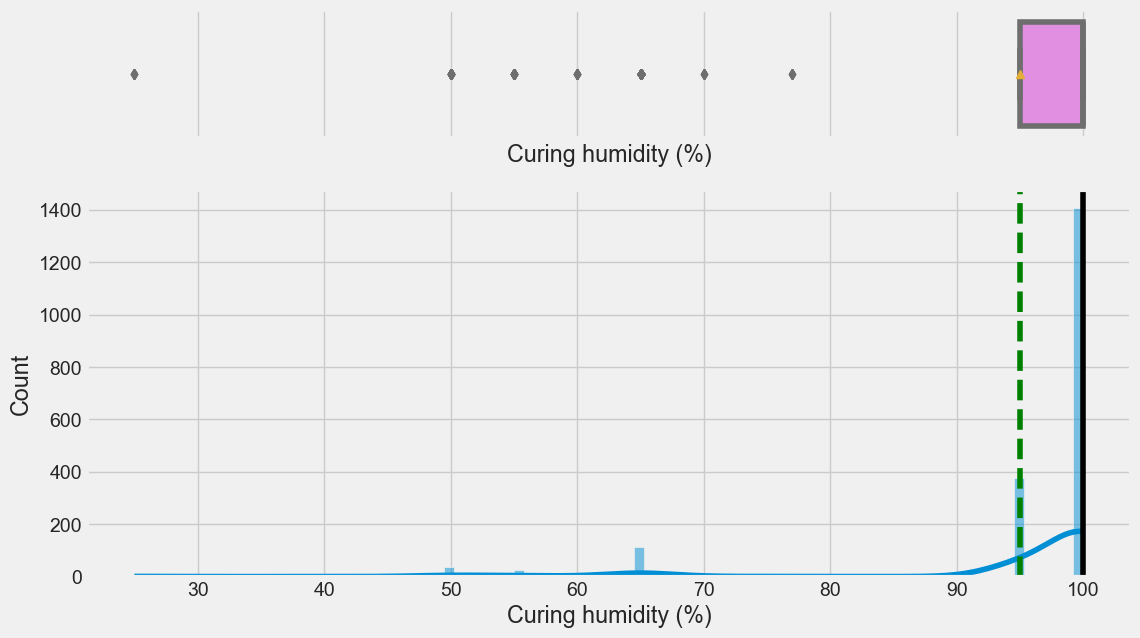

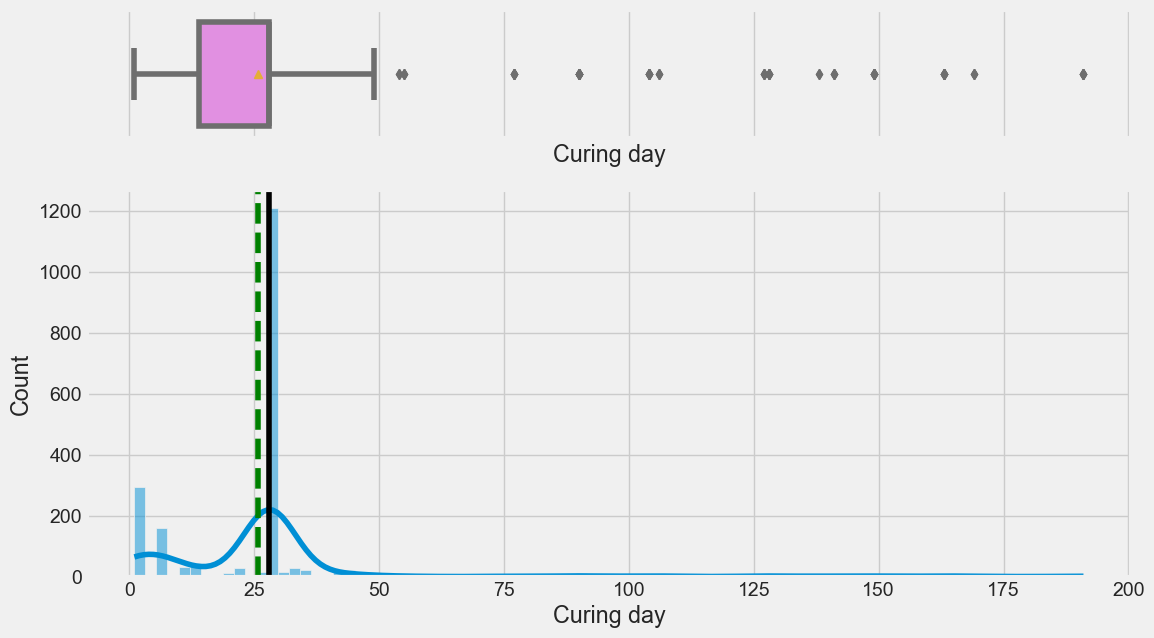

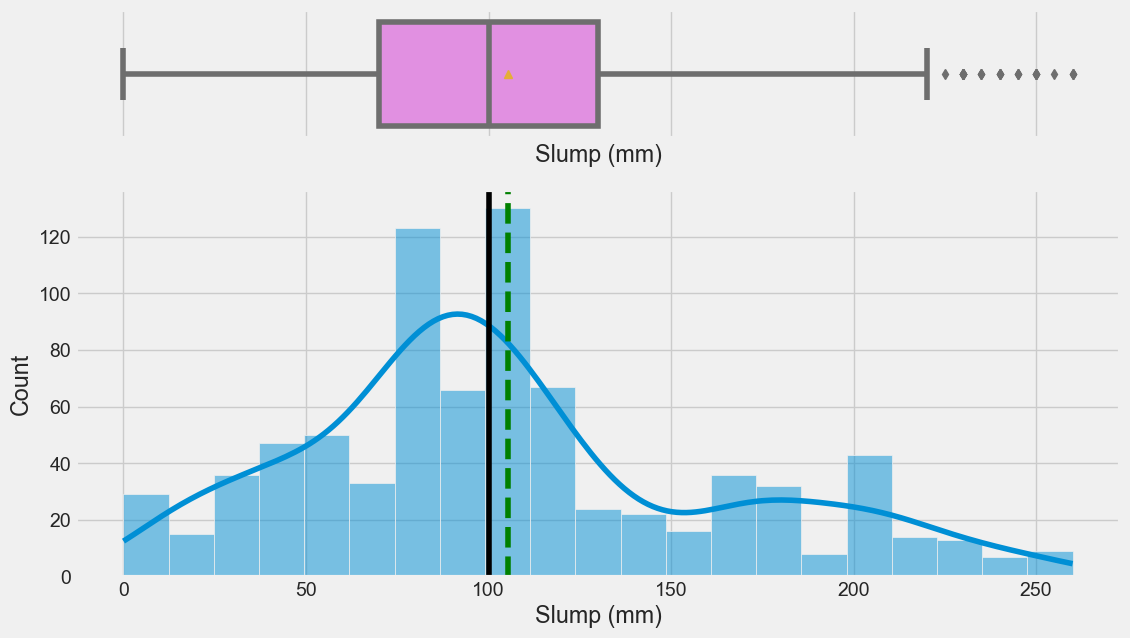

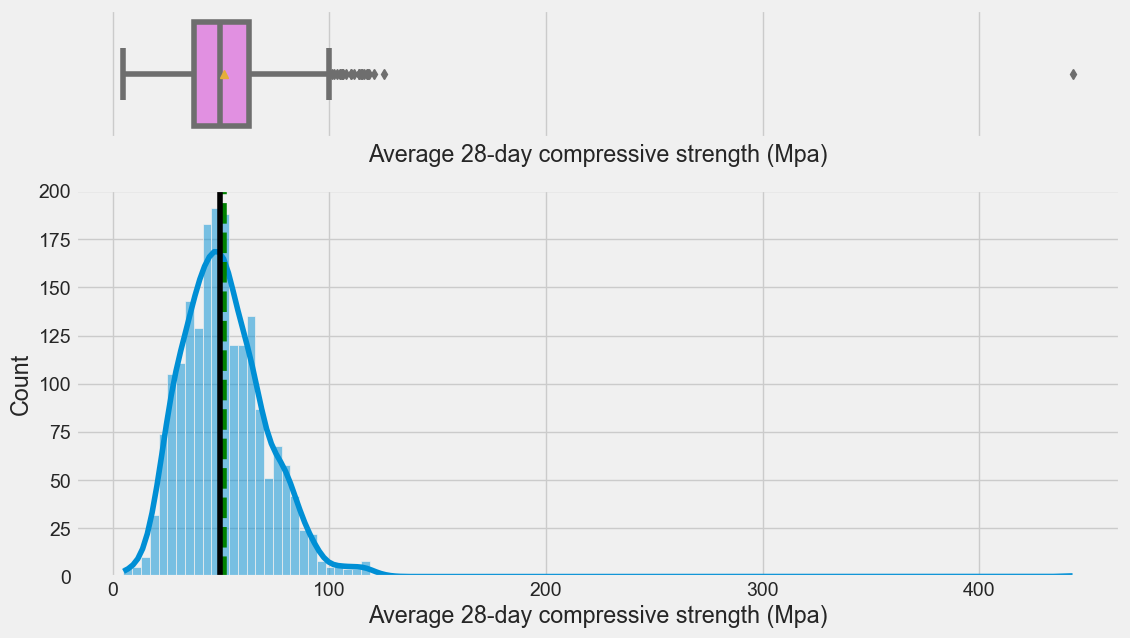

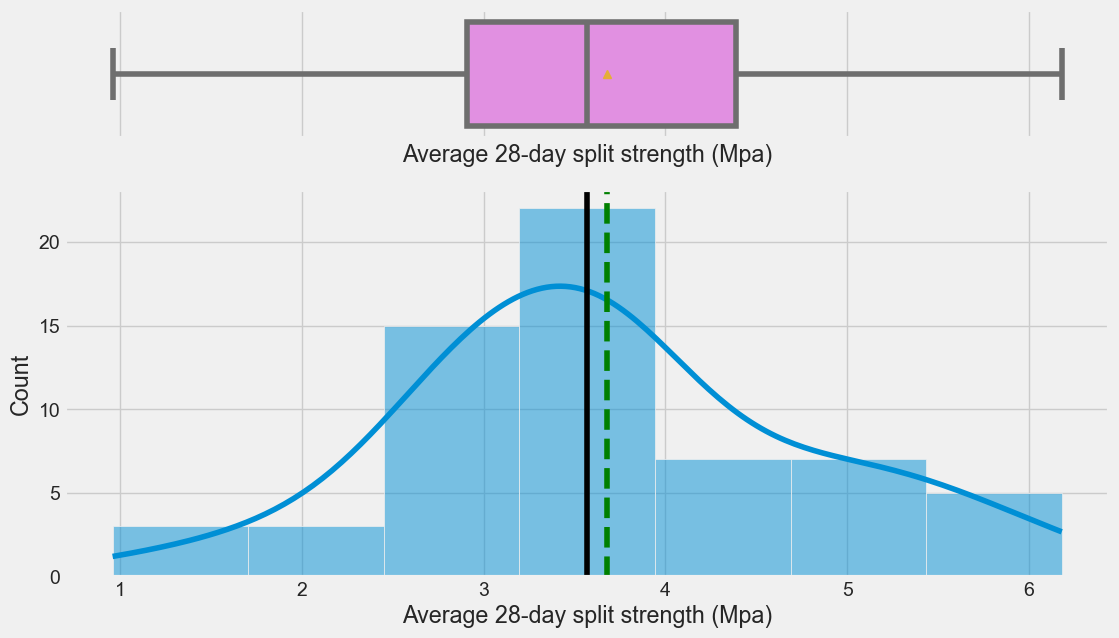

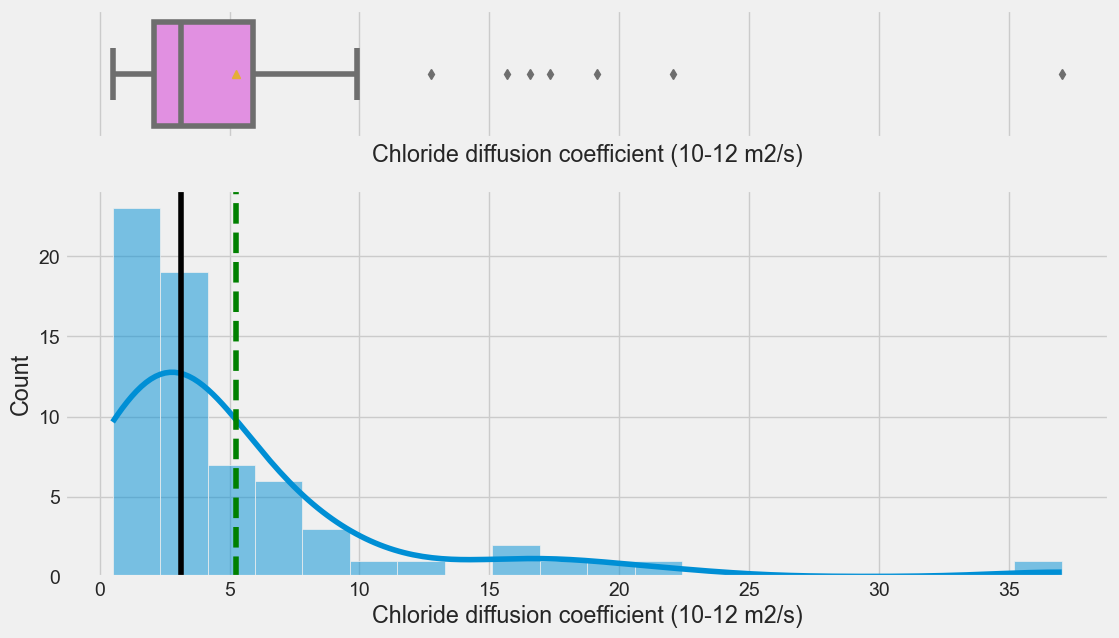

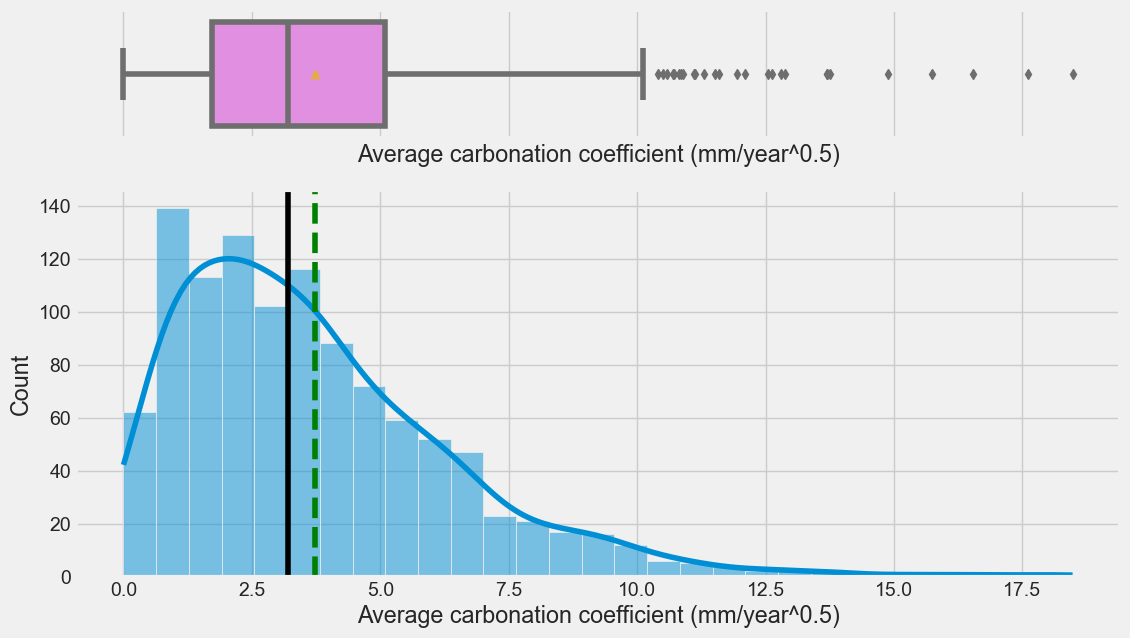

In [13]:
for col in num_df.columns:
    hist_boxplot(num_df, col)

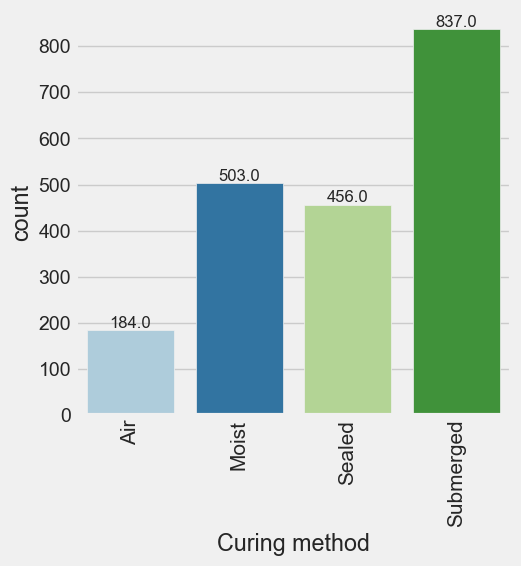

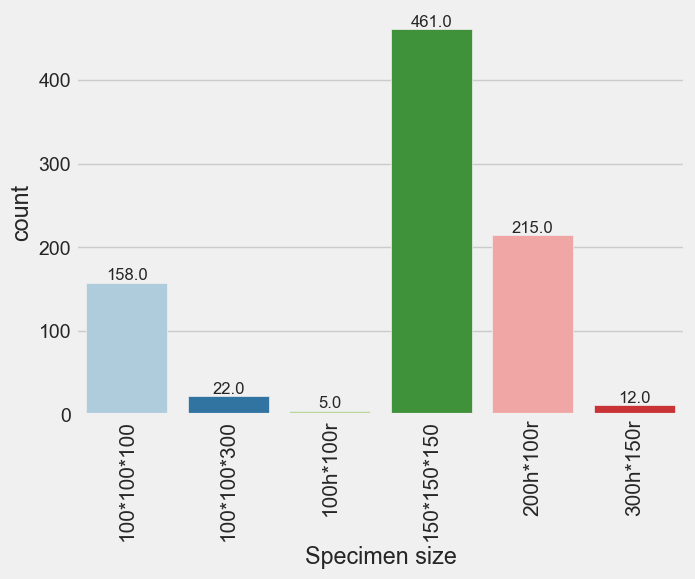

In [14]:
for col in obj_df.columns:
    labeled_barplot(obj_df, col)

* For compressive strength, there is an outlier of >400 MPa.

## Bi-variate

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


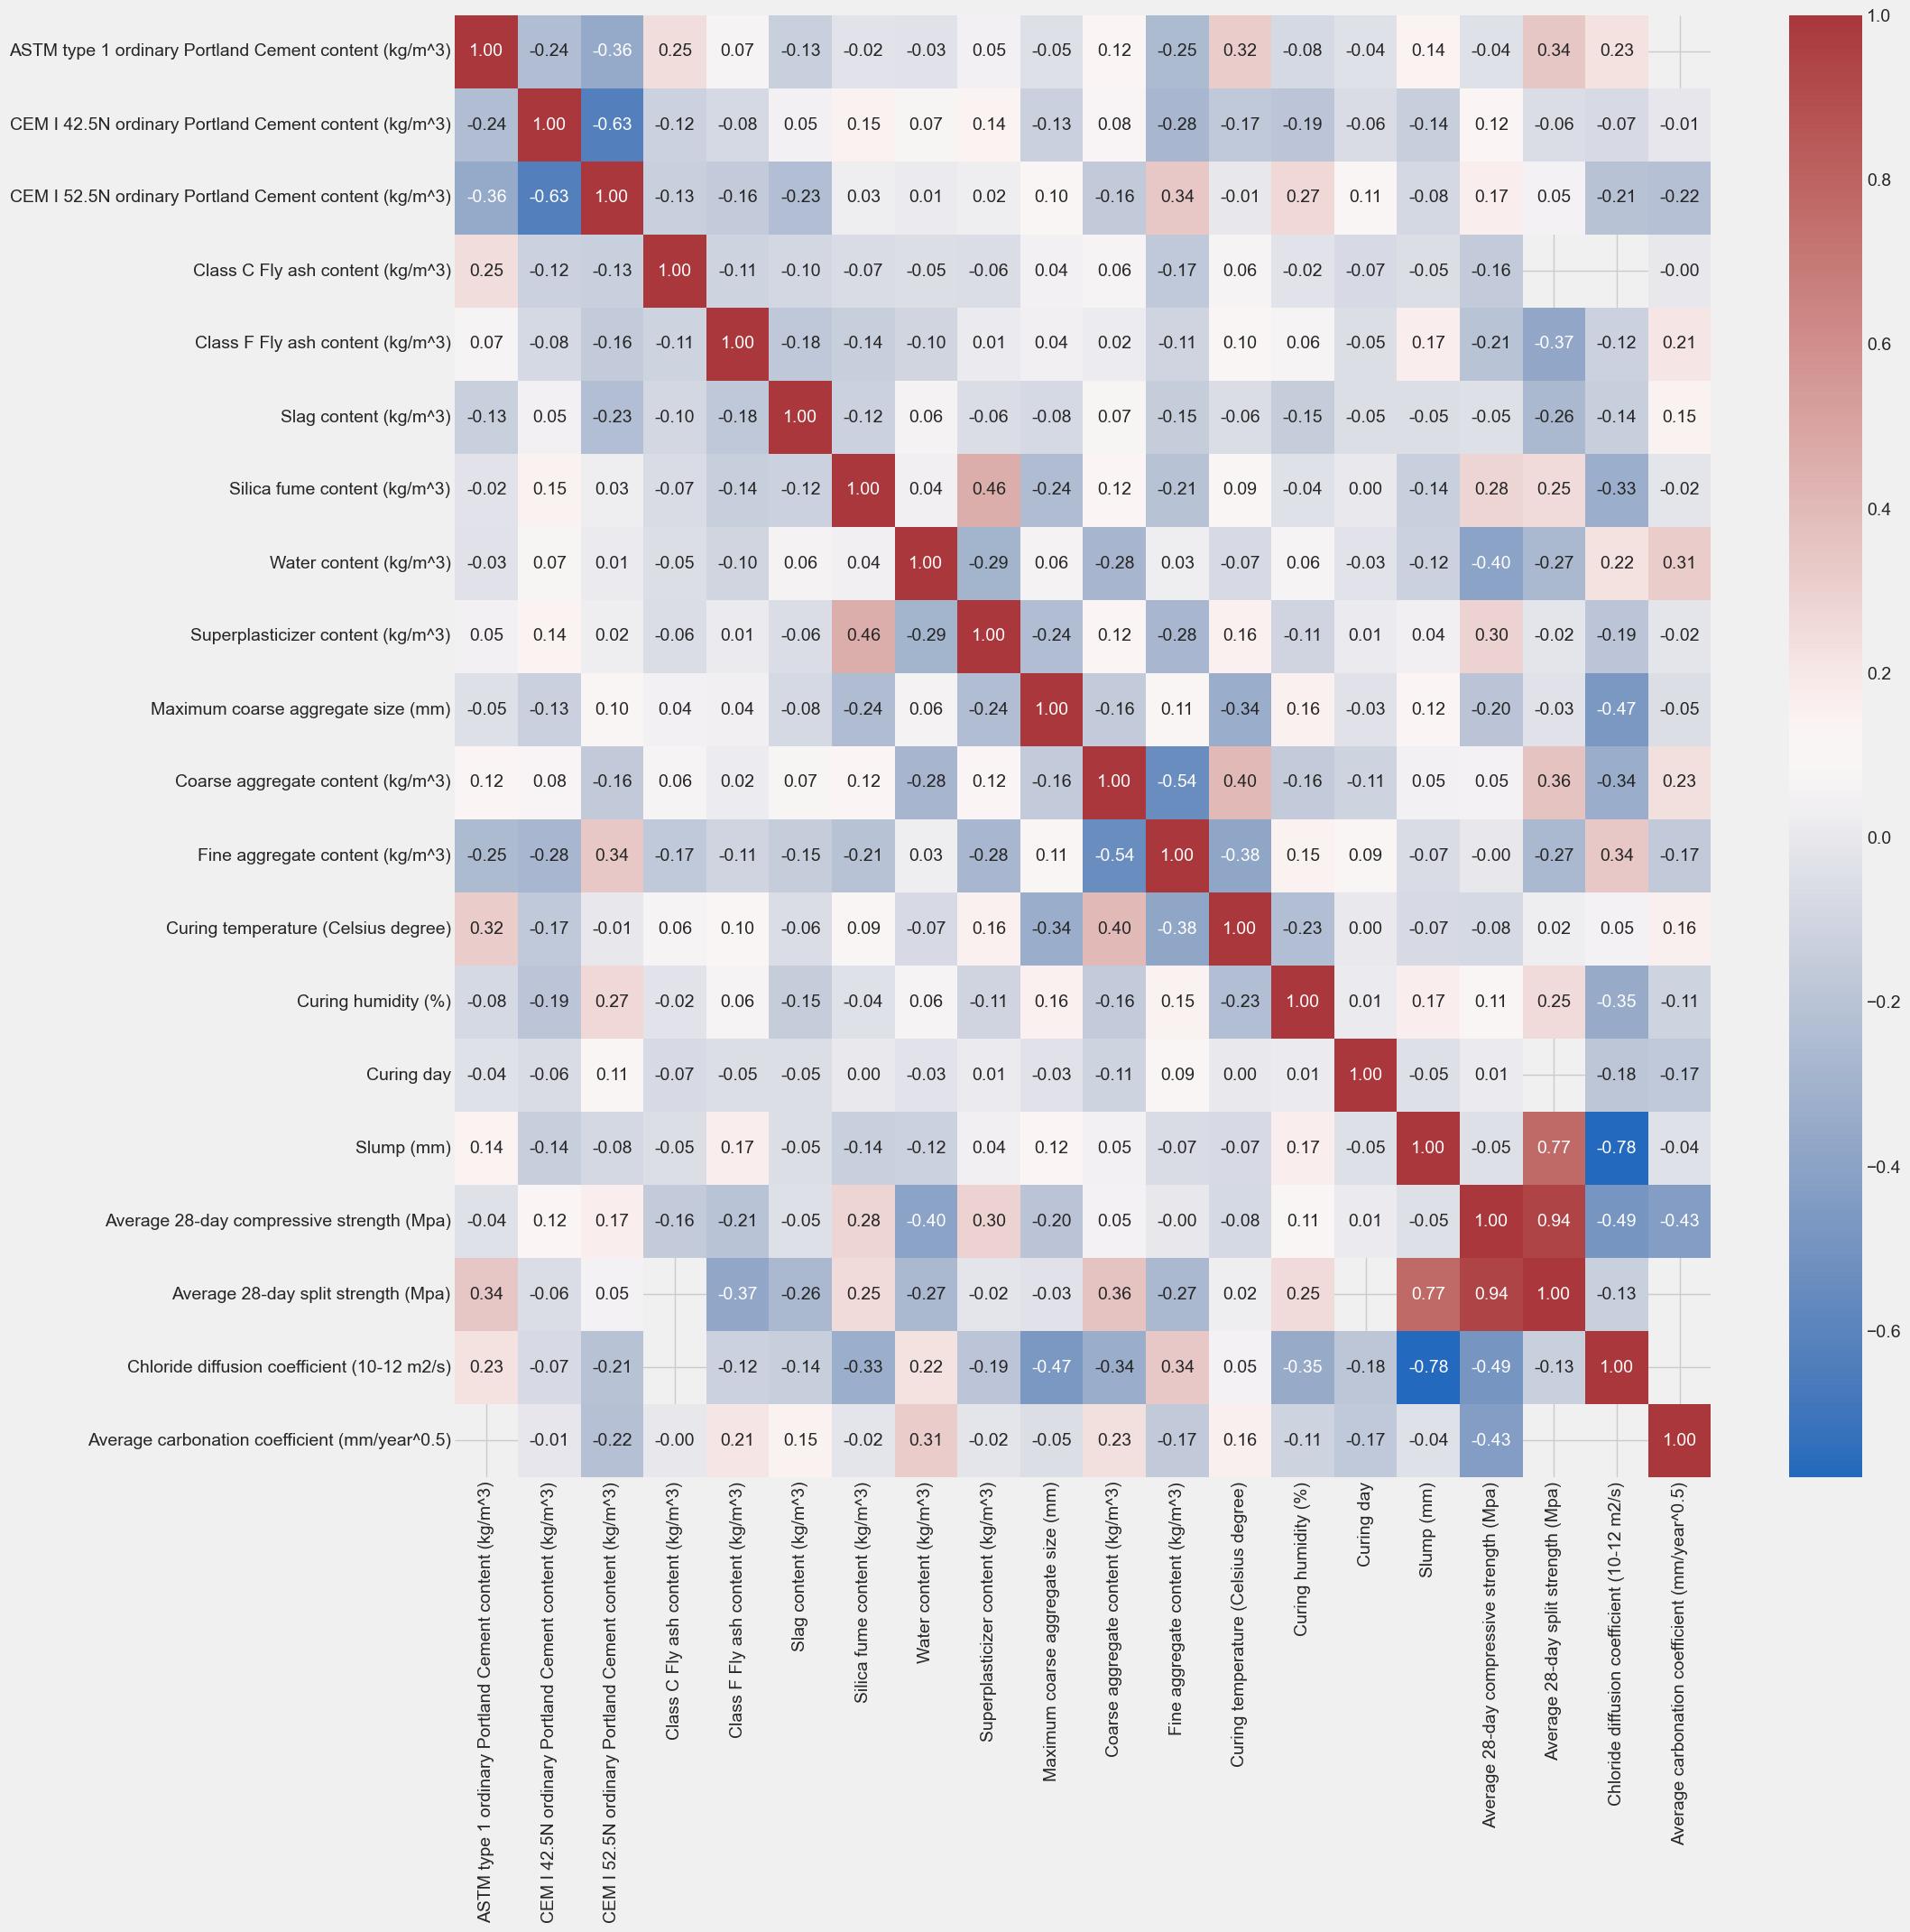

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(semi_df.corr(), annot = True, fmt='.2f', cmap = 'vlag')
plt.show()

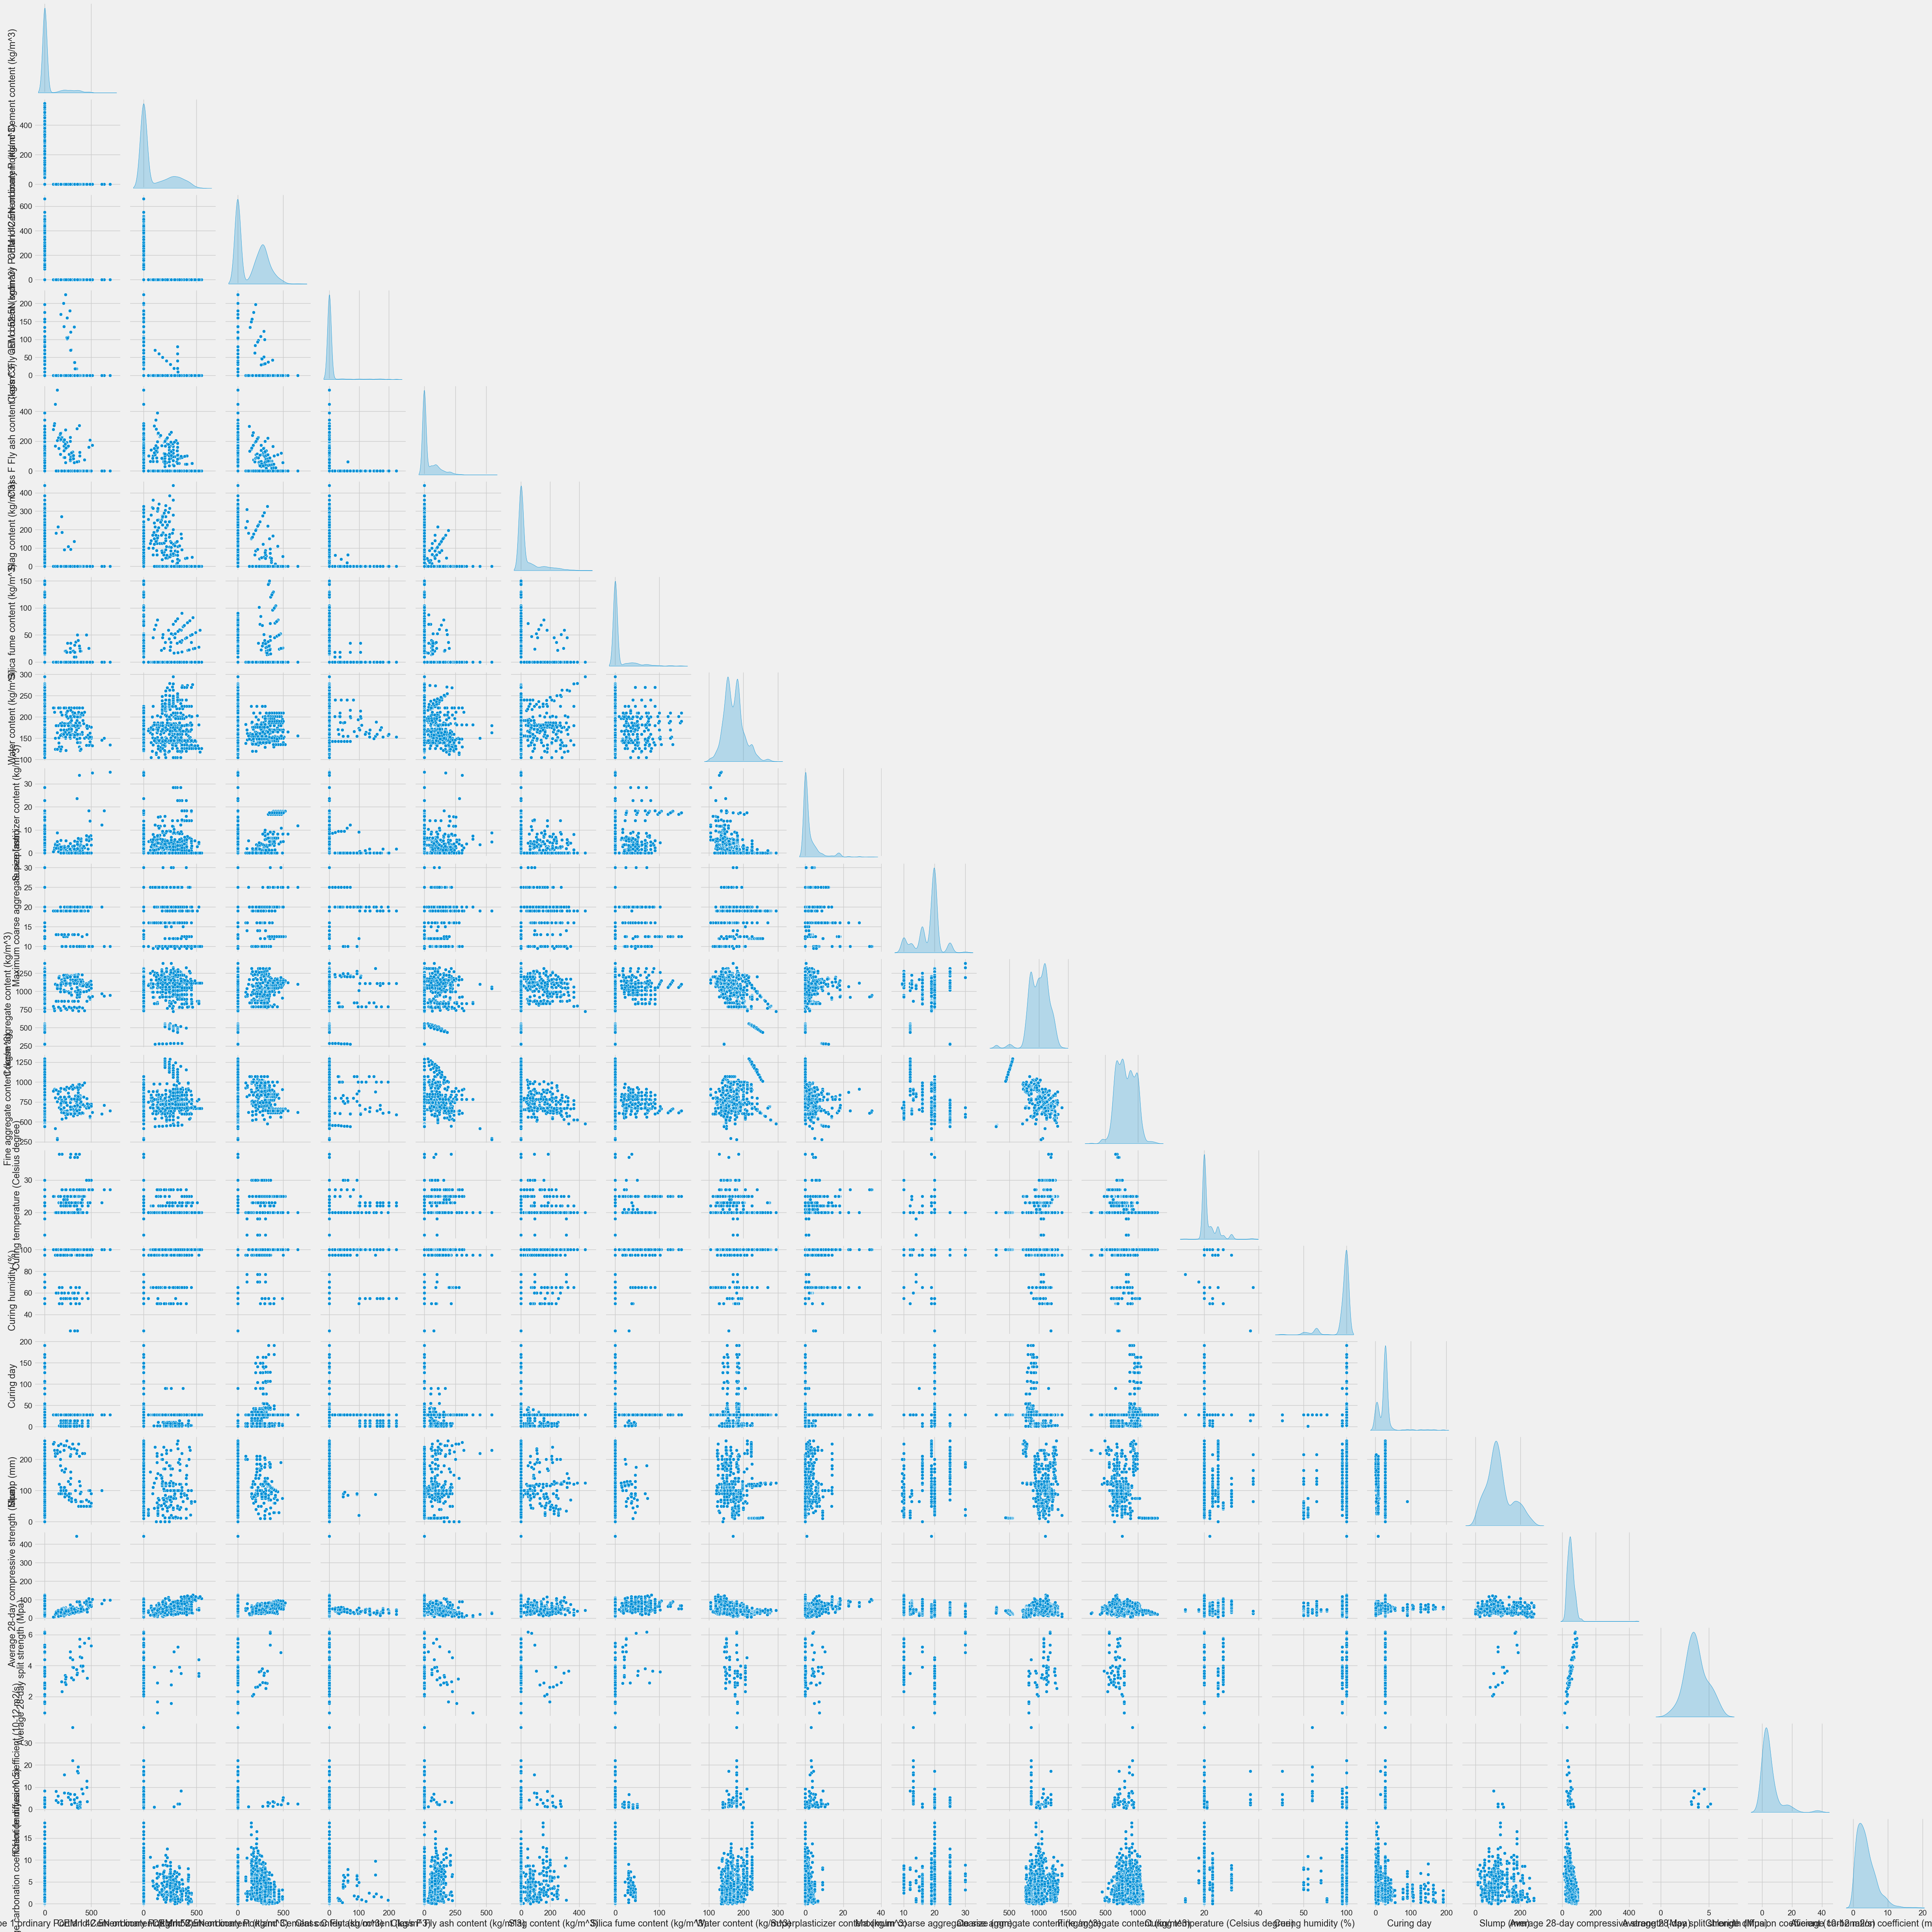

In [16]:
sns.pairplot(semi_df, diag_kind='kde', corner=True);

# Data-Preprocessing

## Outlier Detection

In [16]:
Q1 = semi_df.quantile(0.25)  # To find the 25th percentile
Q3 = semi_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [17]:
# checking the % outliers
outliers = ((semi_df.select_dtypes(include=["float64", "int64"]) < lower) | (semi_df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(semi_df) * 100
outliers

ASTM type 1 ordinary Portland Cement content (kg/m^3)   13.431
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0.101
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0.000
Class C Fly ash content (kg/m^3)                         5.684
Class F Fly ash content (kg/m^3)                         8.300
Slag content (kg/m^3)                                   24.950
Silica fume content (kg/m^3)                            14.839
Water content (kg/m^3)                                   2.767
Superplasticizer content (kg/m^3)                        9.909
Maximum coarse aggregate size (mm)                       0.905
Coarse aggregate content (kg/m^3)                        1.811
Fine aggregate content (kg/m^3)                          0.201
Curing temperature (Celsius degree)                      7.696
Curing humidity (%)                                     10.010
Curing day                                               3.773
Slump (mm)                                             

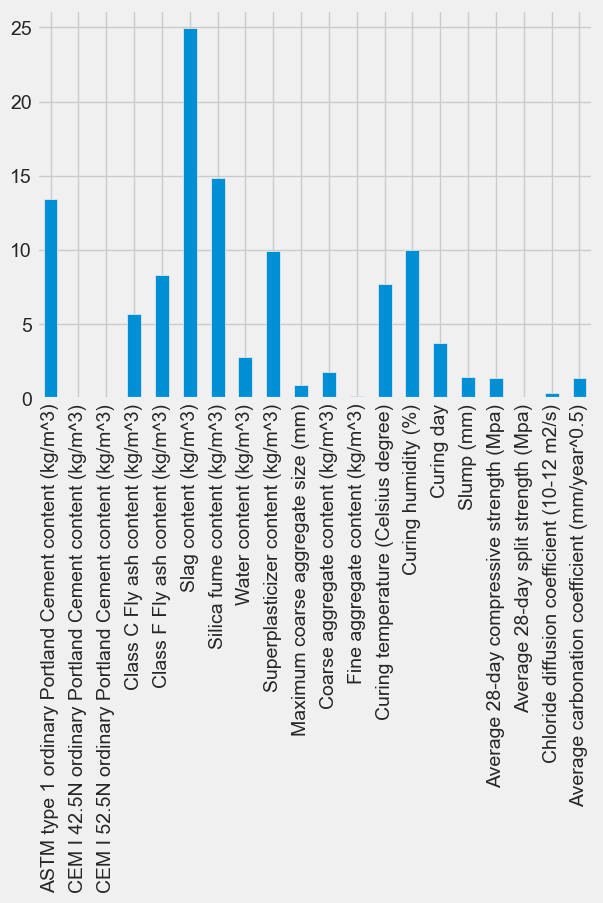

In [18]:
outliers.plot.bar()
plt.show()

## Feature engineering

In [19]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


### Curing method

In [20]:
curing_method = {'Air':0, 
                 'Sealed':1,
                 'Moist':2,
                 'Submerged':3,
                 }

semi_df['Curing method'] = semi_df['Curing method'].map(curing_method)
semi_df['Curing method'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.000    837
2.000    503
1.000    456
0.000    184
Name: Curing method, dtype: int64

### Compressive strength conversion index 

* Inspect the outliers before continuing  

In [21]:
semi_df[semi_df['Average 28-day compressive strength (Mpa)']>400] 

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
1657                                            340.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
1657                                              0.000       

      CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
1657                                              0.000       

      Class C Fly ash content (kg/m^3)  Class F Fly ash content (kg/m^3)  \
1657                             0.000                             0.000   

      Slag content (kg/m^3)  Silica fume content (kg/m^3)  \
1657                  0.000                         0.000   

      Water content (kg/m^3)  Superplasticizer content (kg/m^3)  \
1657                 170.000                              0.850   

      Maximum coarse aggregate size (mm)  ...  Curing method  \
1657                              19.000  ...          3.000   

      Curing temperature (Celsius degree)  Curing humidity (%)  Curing day  \
1657                               22.000              100.000       7.000   

      Slump (mm)  Average 28-day compressive strength (Mpa)  \
1657         NaN                                    443.000   

      Average 28-day split strength (Mpa)  \
1657                                  NaN   

      Chloride diffusion coefficient (10-12 m2/s)  \
1657                                          NaN   

      Average carbonation coefficient (mm/year^0.5)  Specimen size  
1657                                            NaN      200h*100r  

[1 rows x 22 columns]

* It is likely to be a typo.

Ignoring `palette` because no `hue` variable has been assigned.


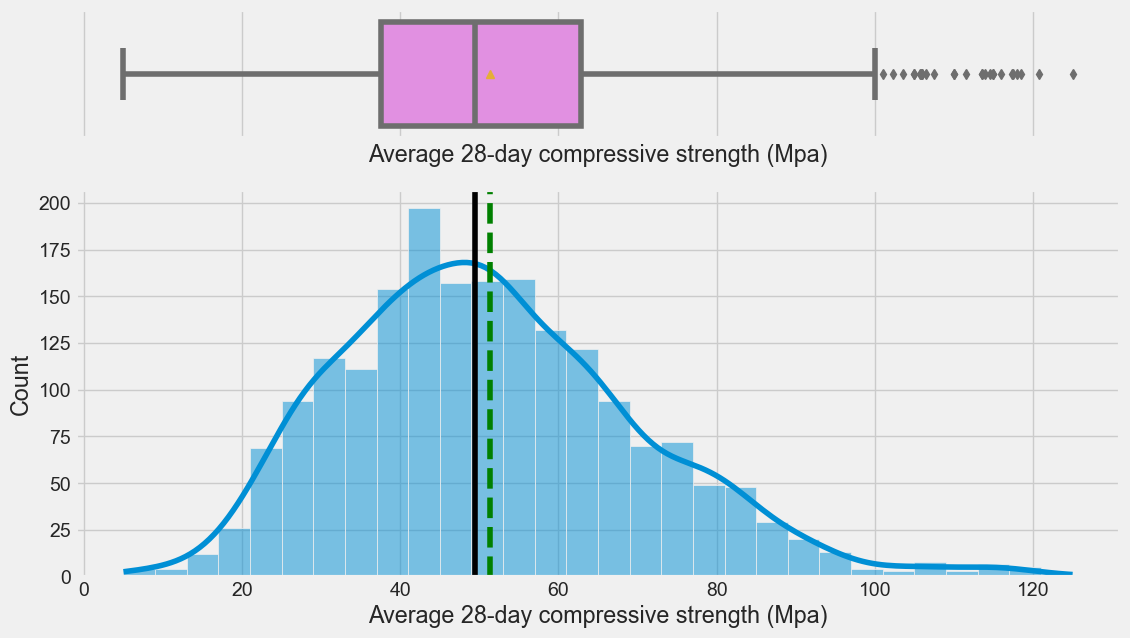

In [22]:
filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

# Check if only one row is obtained
if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

ValueError: Could not save to JPEG for display

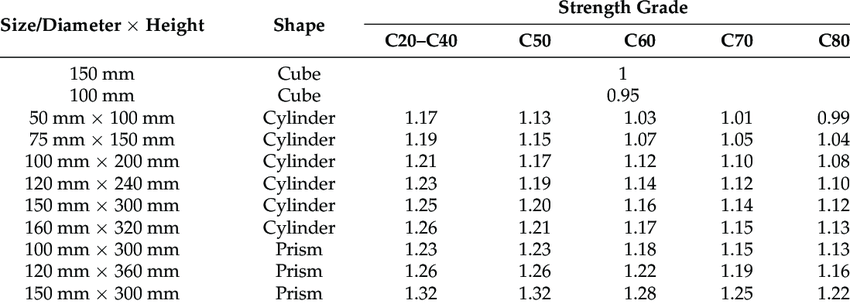

In [23]:
from PIL import Image
from  IPython.display import display

img = Image.open("C:/Users/leeno/Desktop/Dataspell/4102/Conversion-factors-of-compressive-strength-13-16.png")
display(img)

# https://www.researchgate.net/figure/Conversion-factors-of-compressive-strength-13-16_tbl1_358411439

In [24]:
conversion_factors = {
    '150*150*150': 1.0,
    '200h*100r': {
        (15, 44): 1.21,
        (45, 54): 1.17,
        (55, 64): 1.12,
        (65, 74): 1.10,
        (75, 84): 1.08,
        (85, 94): 1.06,
        (95, 104): 1.04, # Guess, out of range
        (105, 114): 1.02, 
    },
    '100*100*100': 0.95,
    '100*100*300': {},  # No suitable conversion index available
    '300h*150r': {
        (15, 44): 1.32,
        (45, 54): 1.32,
        (55, 64): 1.28,
        (65, 74): 1.25,
        (75, 84): 1.22,
        (85, 94): 1.19,
        (95, 104): 1.16,
        (105, 114): 1.13,
    },
    '100h*100r': {},  # No suitable conversion index available
}

def convert_strength(row):
    size = row['Specimen size']
    strength = row['Average 28-day compressive strength (Mpa)']

    original_size = size  # Store the original size

    if size in conversion_factors:
        factor = conversion_factors[size]

        if isinstance(factor, dict):
            for range_, conversion_factor in factor.items():
                lower_bound, upper_bound = range_
                if lower_bound <= strength < upper_bound:
                    return strength * conversion_factor
        else:
            return strength * factor

    return strength

# Apply the conversion function to the DataFrame
semi_df['Converted Strength'] = semi_df.apply(convert_strength, axis=1)

# Print the updated DataFrame
print(semi_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.000       
3                                                 0.000       
4                                                 0.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                 0.000       
1                                                 0.000       
2                                                 0.00


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
# Create a boolean mask indicating differences between the columns
strength_diff_mask = semi_df['Average 28-day compressive strength (Mpa)'] != semi_df['Converted Strength']

# Filter the DataFrame to show rows where the columns are different
different_strength_df = semi_df[strength_diff_mask]

# Print the resulting DataFrame
print(different_strength_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
1167                                            372.000       
1168                                            280.000       
1169                                            186.000       
1170                                            280.000       
1171                                            156.000       
...                                                 ...       
1983                                            350.000       
1984                                            380.000       
1985                                            370.000       
1986                                            360.000       
1987                                            350.000       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
1167                                              0.000       
1168                                              0.000       
1169                                              0.00

In [26]:
semi_df['Converted Strength']

0      75.930
1      64.500
2      49.230
3      36.000
4      62.800
        ...  
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
Name: Converted Strength, Length: 1988, dtype: float64

In [27]:
new_df = semi_df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [28]:
new_df = new_df.drop(['Curing day', 'Curing humidity (%)', 'Slump (mm)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average carbonation coefficient (mm/year^0.5)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Specimen size'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

## Train-Test split (drop na)

In [29]:
new_df_drop = new_df.copy()
new_df_drop.dropna(inplace = True)

In [30]:
new_df_drop.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing method                                            0
Curing temperature (Celsius degree)                      0
Converted Strength                                       0
dtype: int64

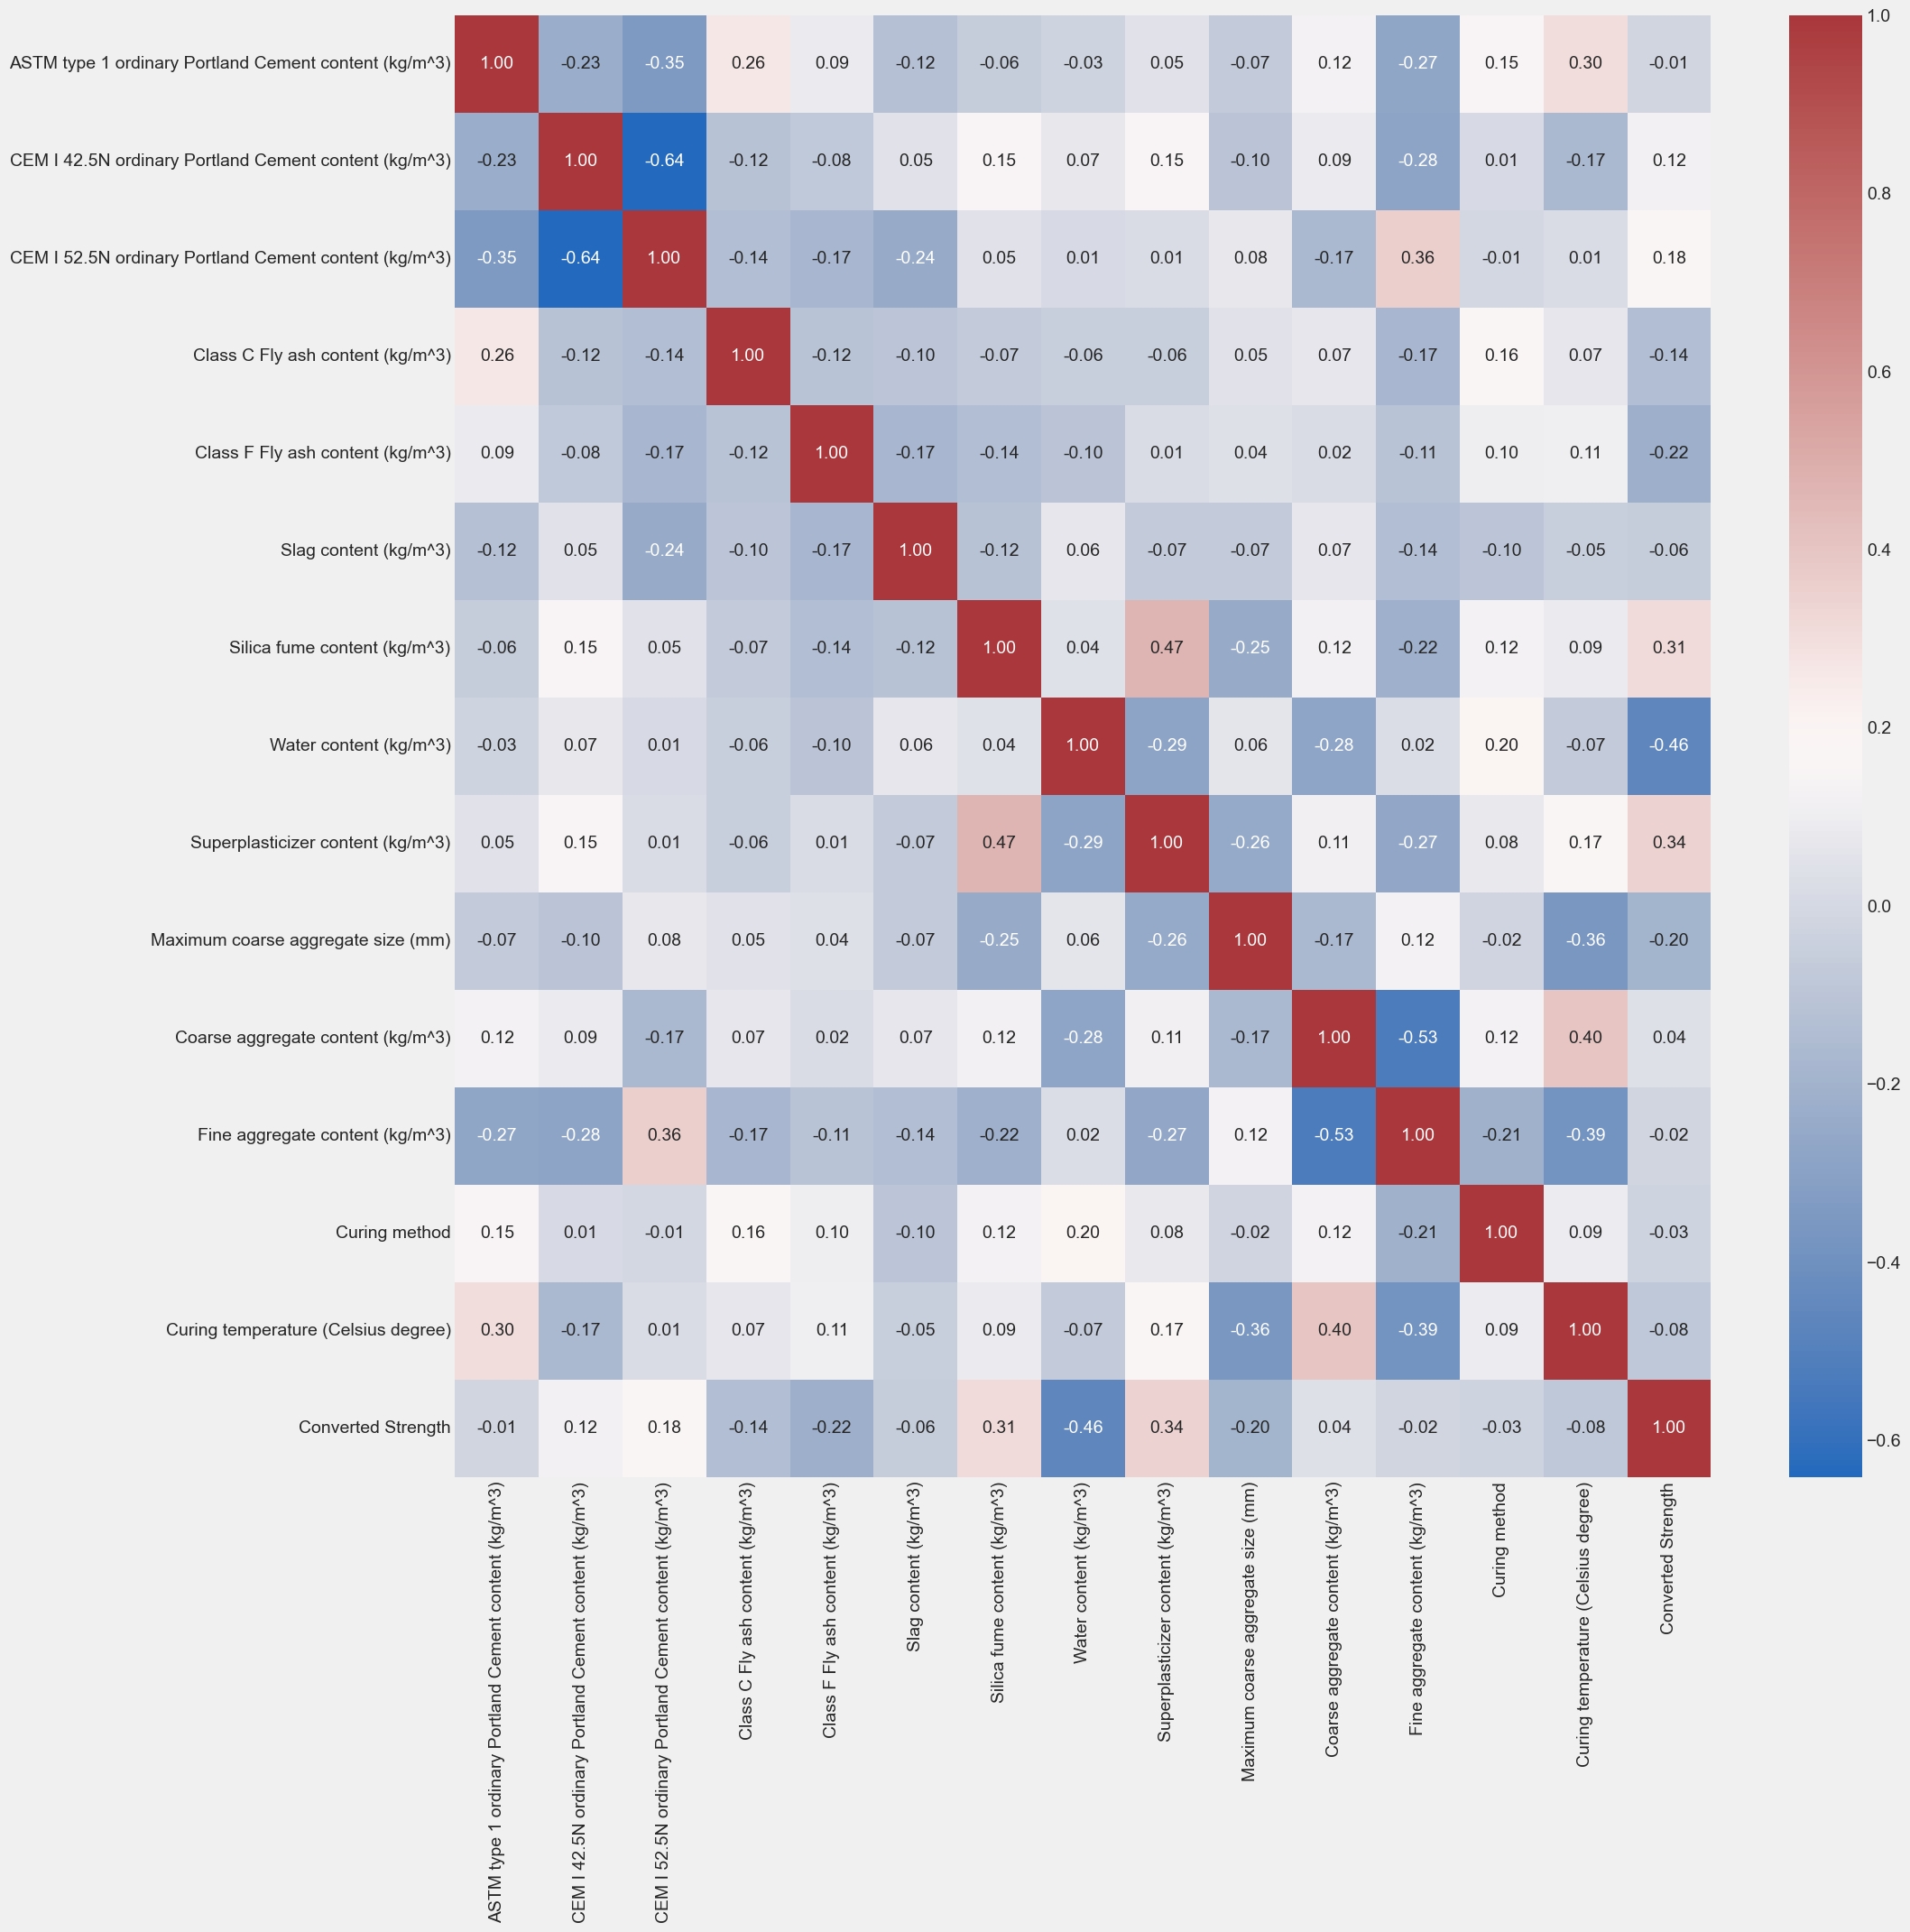

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'vlag')
plt.show()

In [32]:
X = new_df_drop.drop('Converted Strength', axis = 1)
Y = new_df_drop['Converted Strength']

# Repeated k fold

In [33]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Model Evaluation Criteria

* MAE, MSE, R-square, and Adjusted R-square

In [34]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [35]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [36]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=42)))

In [37]:
from numpy import mean
scores = []
for model in models:
    score = cross_val_score(model[1], X, Y, cv = rkf, n_jobs=-1)
    scores.append(score)
mean_score = [mean(score) for score in scores]

for model, mean_score in zip(models, mean_score):
    print(f'{model[0]} Mean score: {mean_score}')

Bagging Mean score: 0.9021665325796411
Random forest Mean score: 0.9135473007598705
AdaBoost Mean score: 0.665678697158445
Gradient_Boost Mean score: 0.8253815333126859
XGBoost Mean score: 0.922657772307365


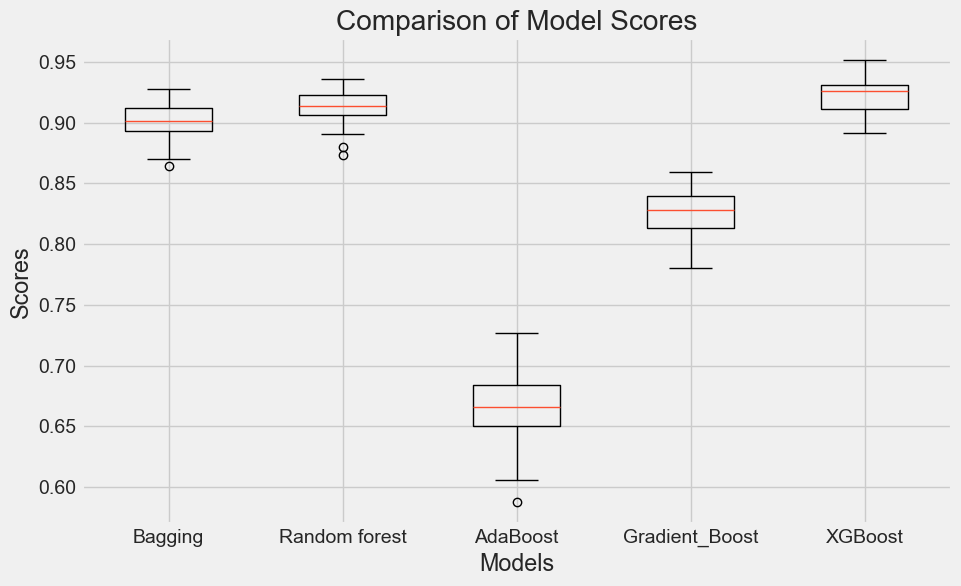

In [38]:
# Extract model names and scores for plotting
model_names = [model[0] for model in models]
score = scores

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(score, labels=model_names)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')
plt.show()

# Hyperparameter tuning

## Bagging

In [39]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators (decision trees)
    'max_samples': [0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, cv=5, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.8, 'bootstrap': True} with CV score=0.49158848968278723:
CPU times: total: 422 ms
Wall time: 4.48 s


In [40]:
best_params = randomized_cv.best_params_
best_model = BaggingRegressor(**best_params)
score = mean(cross_val_score(best_model, X, Y, cv= rkf, n_jobs=-1))
print(f'The tunned score of {models[0][0]} is {score}')

The tunned score of Bagging is 0.915951685787325


## Random Forest

In [41]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of the decision trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 4),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1,  cv=5, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True} with CV score=0.487356866461234:
CPU times: total: 203 ms
Wall time: 8.26 s


In [42]:
best_params = randomized_cv.best_params_
best_model = RandomForestRegressor(**best_params)
score = mean(cross_val_score(best_model, X, Y, cv= rkf, n_jobs=-1))
print(f'The tunned score of {models[1][0]} is {score}')

The tunned score of Random forest is 0.9178970332316047


## AdaBoost

In [43]:
%%time

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'learning_rate': [0.5, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each base estimator
    'loss': ['linear', 'square', 'exponential'],  # Loss function to use when updating the weights after each boosting iteration
    'random_state': [42]  # Random seed for reproducibility
}


scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_jobs = -1,  cv=5, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.5} with CV score=0.3950613788637817:
CPU times: total: 281 ms
Wall time: 2.83 s


In [44]:
best_params = randomized_cv.best_params_
best_model = AdaBoostRegressor(**best_params)
score = mean(cross_val_score(best_model, X, Y, cv= rkf, n_jobs=-1))
print(f'The tunned score of {models[2][0]} is {score}')

The tunned score of AdaBoost is 0.6700160061864547


# Gradient Boosting

In [45]:
%%time

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.1, 0.05,.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 'sqrt'],  # Number of features to consider at each split
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, cv=5, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1} with CV score=0.46951768375354186:
CPU times: total: 62.5 ms
Wall time: 1.85 s


In [47]:
best_params = randomized_cv.best_params_
best_model = GradientBoostingRegressor(**best_params)
score = mean(cross_val_score(best_model, X, Y, cv= rkf, n_jobs=-1))
print(f'The tunned score of {models[3][0]} is {score}')

The tunned score of Gradient_Boost is 0.8377215144286144


## XG Boost

In [50]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [ 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.5],  # L2 regularization term on weights
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=50, n_jobs = -1, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'random_state': 42, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8} with CV score=0.5877339973840836:
CPU times: total: 4.95 s
Wall time: 20.7 s


In [51]:
best_params = randomized_cv.best_params_
best_model = XGBRegressor(**best_params)
score = mean(cross_val_score(best_model, X, Y, cv= rkf, n_jobs=-1))
print(f'The tunned score of {models[4][0]} is {score}')

The tunned score of XGBoost is 0.8988942798924425


# Prediction on the provided data

In [39]:
lab = pd.read_excel('28dCompressiveResults_2_reworked.xlsx')
lab

No.       Mix No.  Cementitious materials\n(kg/m3)  OPC\n(kg/m3)  Type  \
0     1    FA-0.45-12                          400.000       352.000    FA   
1     2    SF-0.35-10                          497.143       447.429    SF   
2     3  GGBS-0.45-25                          400.000       300.000  GGBS   
3     4     SF-0.55-5                          334.545       317.818    SF   
4     5    SF-0.45-10                          400.000       360.000    SF   
5     6    FA-0.45-25                          400.000       300.000    FA   
6     7     SF-0.35-5                          497.143       472.286    SF   
7     8    FA-0.35-25                          497.143       372.857    FA   
8     9    FA-0.55-40                          334.545       200.727    FA   
9    10  GGBS-0.45-50                          400.000       200.000  GGBS   
10   11    SF-0.55-15                          334.545       284.364    SF   
11   12  GGBS-0.35-25                          497.143       372.857  GGBS   
12   13    FA-0.55-25                          334.545       250.909    FA   
13   14    FA-0.35-12                          497.143       437.486    FA   
14   15    FA-0.55-12                          334.545       294.400    FA   
15   16  GGBS-0.35-75                          497.143       124.286  GGBS   
16   17  GGBS-0.55-50                          334.545       167.273  GGBS   
17   18    SF-0.45-15                          400.000       340.000    SF   
18   19    SF-0.35-15                          497.143       422.571    SF   
19   20    FA-0.45-40                          400.000       240.000    FA   
20   21  GGBS-0.35-50                          497.143       248.571  GGBS   
21   22    SF-0.55-10                          334.545       301.091    SF   
22   23    FA-0.35-40                          497.143       298.286    FA   
23   24  GGBS-0.55-25                          334.545       250.909  GGBS   
24   25  GGBS-0.45-75                          400.000       100.000  GGBS   
25   26     SF-0.45-5                          400.000       380.000    SF   
26   27  GGBS-0.55-75                          334.545        83.636  GGBS   

    Replacement level (%)  Content\n(kg/m3)  Aggregate proportion  \
0                      12            48.000                 0.760   
1                      10            49.714                 0.723   
2                      25           100.000                 0.760   
3                       5            16.727                 0.785   
4                      10            40.000                 0.760   
5                      25           100.000                 0.760   
6                       5            24.857                 0.723   
7                      25           124.286                 0.723   
8                      40           133.818                 0.785   
9                      50           200.000                 0.760   
10                     15            50.182                 0.785   
11                     25           124.286                 0.723   
12                     25            83.636                 0.785   
13                     12            59.657                 0.723   
14                     12            40.145                 0.785   
15                     75           372.857                 0.723   
16                     50           167.273                 0.785   
17                     15            60.000                 0.760   
18                     15            74.571                 0.723   
19                     40           160.000                 0.760   
20                     50           248.571                 0.723   
21                     10            33.455                 0.785   
22                     40           198.857                 0.723   
23                     25            83.636                 0.785   
24                     75           300.000                 0.760   
25                      5

# Data Cleaning

In [40]:
lab.columns

Index(['No.', 'Mix No.', 'Cementitious materials\n(kg/m3)', 'OPC\n(kg/m3)',
       'Type', 'Replacement level (%)', 'Content\n(kg/m3)',
       'Aggregate proportion', 'Fine aggregate proportion',
       'Aggregate content\n(kg/m3)', '20mm\n(kg/m3)', '10mm\n(kg/m3)',
       'Fine\n(kg/m3)', 'Water\n(kg/m3)', 'SP\n(L/m3)', 'Curing method',
       'Compressive strength\n(MPa)'],
      dtype='object')

In [41]:
data = lab.copy()
data = data.drop(['No.', 'Mix No.', 'Replacement level (%)', 'Cementitious materials\n(kg/m3)', 
                  '20mm\n(kg/m3)', '10mm\n(kg/m3)', 'Aggregate proportion', 'Fine aggregate proportion', 
                  ], axis= 1)
data['ASTM type 1 ordinary Portland Cement content (kg/m^3)'] = 0
data['CEM I 52.5N ordinary Portland Cement content (kg/m^3)'] = 0
data['Class C Fly ash content (kg/m^3)'] = 0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   OPC
(kg/m3)                                            27 non-null     float64
 1   Type                                                   27 non-null     object 
 2   Content
(kg/m3)                                        27 non-null     float64
 3   Aggregate content
(kg/m3)                              27 non-null     float64
 4   Fine
(kg/m3)                                           27 non-null     float64
 5   Water
(kg/m3)                                          27 non-null     int64  
 6   SP
(L/m3)                                              27 non-null     float64
 7   Curing method                                          27 non-null     object 
 8   Compressive strength
(MPa)                          

In [42]:
data

OPC\n(kg/m3)  Type  Content\n(kg/m3)  Aggregate content\n(kg/m3)  \
0        352.000    FA            48.000                    1835.000   
1        447.429    SF            49.714                    1751.732   
2        300.000  GGBS           100.000                    1835.000   
3        317.818    SF            16.727                    1891.205   
4        360.000    SF            40.000                    1835.000   
5        300.000    FA           100.000                    1835.000   
6        472.286    SF            24.857                    1751.732   
7        372.857    FA           124.286                    1751.732   
8        200.727    FA           133.818                    1891.205   
9        200.000  GGBS           200.000                    1835.000   
10       284.364    SF            50.182                    1891.205   
11       372.857  GGBS           124.286                    1751.732   
12       250.909    FA            83.636                    1891.205   
13       437.486    FA            59.657                    1751.732   
14       294.400    FA            40.145                    1891.205   
15       124.286  GGBS           372.857                    1751.732   
16       167.273  GGBS           167.273                    1891.205   
17       340.000    SF            60.000                    1835.000   
18       422.571    SF            74.571                    1751.732   
19       240.000    FA           160.000                    1835.000   
20       248.571  GGBS           248.571                    1751.732   
21       301.091    SF            33.455                    1891.205   
22       298.286    FA           198.857                    1751.732   
23       250.909  GGBS            83.636                    1891.205   
24       100.000  GGBS           300.000                    1835.000   
25       380.000    SF            20.000                    1835.000   
26        83.636  GGBS           250.909                    1891.205   

    Fine\n(kg/m3)  Water\n(kg/m3)  SP\n(L/m3) Curing method  \
0         825.750             180       4.570        Sealed   
1         963.453             174       5.290        Sealed   
2         825.750             180       3.300        Sealed   
3        1040.163             184       3.400     Submerged   
4         642.250             180       4.580     Submerged   
5         642.250             180       2.300     Submerged   
6         613.106             174       5.000           Air   
7         963.453             174       4.650        Sealed   
8         661.922             184       1.710        Sealed   
9         642.250             180       2.420     Submerged   
10        661.922             184       4.450        Sealed   
11        613.106             174       3.500           Air   
12        851.042             184       2.580           Air   
13        613.106             174       4.600           Air   
14       1040.163             184       3.800     Submerged   
15        788.279             174       2.520     Submerged   
16        851.042             184       2.180           Air   
17       1009.250             180       5.230           Air   
18        788.279             174       5.860     Submerged   
19       1009.250             180       4.000           Air   
20        963.453             174       2.750        Sealed   
21        851.042             184       4.100           Air   
22        788.279             174       5.290     Submerged   
23       1040.163             184       3.000     Submerged   
24       1009.250             180       2.310           Air   
25        825.750             180       3.800        Sealed   
26        661.922             184       2.070        Sealed   

    Compressive strength\n(MPa)  \
0                        56.800   
1                        76.205   
2                        36.500   
3                        55.190   
4                        76.010   
5           

In [43]:
data.columns

Index(['OPC\n(kg/m3)', 'Type', 'Content\n(kg/m3)',
       'Aggregate content\n(kg/m3)', 'Fine\n(kg/m3)', 'Water\n(kg/m3)',
       'SP\n(L/m3)', 'Curing method', 'Compressive strength\n(MPa)',
       'ASTM type 1 ordinary Portland Cement content (kg/m^3)',
       'CEM I 52.5N ordinary Portland Cement content (kg/m^3)',
       'Class C Fly ash content (kg/m^3)'],
      dtype='object')

In [44]:
data  = data.rename(columns = {'OPC\n(kg/m3)': 'CEM I 42.5N ordinary Portland Cement content (kg/m^3)',
                     'Fine\n(kg/m3)': 'Fine aggregate content (kg/m^3)',
                     'Water\n(kg/m3)': 'Water content (kg/m^3)',
                     'SP\n(L/m3)': 'Superplasticizer content (kg/m^3)',
                     'Compressive strength\n(MPa)': 'Converted Strength'})
data

CEM I 42.5N ordinary Portland Cement content (kg/m^3)  Type  \
0                                             352.000        FA   
1                                             447.429        SF   
2                                             300.000      GGBS   
3                                             317.818        SF   
4                                             360.000        SF   
5                                             300.000        FA   
6                                             472.286        SF   
7                                             372.857        FA   
8                                             200.727        FA   
9                                             200.000      GGBS   
10                                            284.364        SF   
11                                            372.857      GGBS   
12                                            250.909        FA   
13                                            437.486        FA   
14                                            294.400        FA   
15                                            124.286      GGBS   
16                                            167.273      GGBS   
17                                            340.000        SF   
18                                            422.571        SF   
19                                            240.000        FA   
20                                            248.571      GGBS   
21                                            301.091        SF   
22                                            298.286        FA   
23                                            250.909      GGBS   
24                                            100.000      GGBS   
25                                            380.000        SF   
26                                             83.636      GGBS   

    Content\n(kg/m3)  Aggregate content\n(kg/m3)  \
0             48.000                    1835.000   
1             49.714                    1751.732   
2            100.000                    1835.000   
3             16.727                    1891.205   
4             40.000                    1835.000   
5            100.000                    1835.000   
6             24.857                    1751.732   
7            124.286                    1751.732   
8            133.818                    1891.205   
9            200.000                    1835.000   
10            50.182                    1891.205   
11           124.286                    1751.732   
12            83.636                    1891.205   
13            59.657                    1751.732   
14            40.145                    1891.205   
15           372.857                    1751.732   
16           167.273                    1891.205   
17            60.000                    1835.000   
18            74.571                    1751.732   
19           160.000                    1835.000   
20           248.571                    1751.732   
21            33.455                    1891.205   
22           198.857                    1751.732   
23            83.636                    1891.205   
24           300.000                    1835.000   
25            20.000                    1835.000   
26           250.909                    1891.205   

    Fine aggregate content (kg/m^3)  Water content (kg/m^3)  \
0                           825.750                     180   
1                           963.453                     174   
2                           825.750                     180   
3                          1040.163                     184   
4                           642.250                     180   
5                           642.250                     180   
6                           613.106                     174   
7                           963.453                     174   
8                           661.922                     184   
9                           642.250     

In [45]:
data['Coarse aggregate content (kg/m^3)'] = data['Aggregate content\n(kg/m3)'] - data['Fine aggregate content (kg/m^3)']
data = data.drop(['Aggregate content\n(kg/m3)'], axis=1)
data['Maximum coarse aggregate size (mm)'] = 20
data['Curing temperature (Celsius degree)'] = 23
data

CEM I 42.5N ordinary Portland Cement content (kg/m^3)  Type  \
0                                             352.000        FA   
1                                             447.429        SF   
2                                             300.000      GGBS   
3                                             317.818        SF   
4                                             360.000        SF   
5                                             300.000        FA   
6                                             472.286        SF   
7                                             372.857        FA   
8                                             200.727        FA   
9                                             200.000      GGBS   
10                                            284.364        SF   
11                                            372.857      GGBS   
12                                            250.909        FA   
13                                            437.486        FA   
14                                            294.400        FA   
15                                            124.286      GGBS   
16                                            167.273      GGBS   
17                                            340.000        SF   
18                                            422.571        SF   
19                                            240.000        FA   
20                                            248.571      GGBS   
21                                            301.091        SF   
22                                            298.286        FA   
23                                            250.909      GGBS   
24                                            100.000      GGBS   
25                                            380.000        SF   
26                                             83.636      GGBS   

    Content\n(kg/m3)  Fine aggregate content (kg/m^3)  Water content (kg/m^3)  \
0             48.000                          825.750                     180   
1             49.714                          963.453                     174   
2            100.000                          825.750                     180   
3             16.727                         1040.163                     184   
4             40.000                          642.250                     180   
5            100.000                          642.250                     180   
6             24.857                          613.106                     174   
7            124.286                          963.453                     174   
8            133.818                          661.922                     184   
9            200.000                          642.250                     180   
10            50.182                          661.922                     184   
11           124.286                          613.106                     174   
12            83.636                          851.042                     184   
13            59.657                          613.106                     174   
14            40.145                         1040.163                     184   
15           372.857                          788.279                     174   
16           167.273                          851.042                     184   
17            60.000                         1009.250                     180   
18            74.571                          788.279                     174   
19           160.000                         1009.250                     180   
20           248.571                          963.453                     174   
21            33.455                          851.042                     184   
22           198.857                          788.279                     174   
23            83.636                         1040.163                     184   
24           300.000                         1009.250                     180   
25            20.000 

In [46]:
data.columns

Index(['CEM I 42.5N ordinary Portland Cement content (kg/m^3)', 'Type',
       'Content\n(kg/m3)', 'Fine aggregate content (kg/m^3)',
       'Water content (kg/m^3)', 'Superplasticizer content (kg/m^3)',
       'Curing method', 'Converted Strength',
       'ASTM type 1 ordinary Portland Cement content (kg/m^3)',
       'CEM I 52.5N ordinary Portland Cement content (kg/m^3)',
       'Class C Fly ash content (kg/m^3)', 'Coarse aggregate content (kg/m^3)',
       'Maximum coarse aggregate size (mm)',
       'Curing temperature (Celsius degree)'],
      dtype='object')

In [47]:
print(data['Type'].value_counts())

FA      9
SF      9
GGBS    9
Name: Type, dtype: int64


In [48]:
data_pivot = pd.pivot_table(data, index=data.index,
                            columns='Type',
                            values='Content\n(kg/m3)',
                            aggfunc='first',
                            fill_value=0)

# Rename the columns
data_pivot.rename(columns={'FA': 'Class F Fly ash content (kg/m^3)',
                           'SF': 'Silica fume content (kg/m^3)',
                           'GGBS': 'Slag content (kg/m^3)'},
                  inplace=True)

# Merge the new columns with the original DataFrame
data = pd.concat([data, data_pivot], axis=1)

# Drop the 'Type' column
data.drop(['Type', 'Content\n(kg/m3)'], axis=1, inplace=True)

# Display the updated DataFrame
data

CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                             352.000       
1                                             447.429       
2                                             300.000       
3                                             317.818       
4                                             360.000       
5                                             300.000       
6                                             472.286       
7                                             372.857       
8                                             200.727       
9                                             200.000       
10                                            284.364       
11                                            372.857       
12                                            250.909       
13                                            437.486       
14                                            294.400       
15                                            124.286       
16                                            167.273       
17                                            340.000       
18                                            422.571       
19                                            240.000       
20                                            248.571       
21                                            301.091       
22                                            298.286       
23                                            250.909       
24                                            100.000       
25                                            380.000       
26                                             83.636       

    Fine aggregate content (kg/m^3)  Water content (kg/m^3)  \
0                           825.750                     180   
1                           963.453                     174   
2                           825.750                     180   
3                          1040.163                     184   
4                           642.250                     180   
5                           642.250                     180   
6                           613.106                     174   
7                           963.453                     174   
8                           661.922                     184   
9                           642.250                     180   
10                          661.922                     184   
11                          613.106                     174   
12                          851.042                     184   
13                          613.106                     174   
14                         1040.163                     184   
15                          788.279                     174   
16                          851.042                     184   
17                         1009.250                     180   
18                          788.279                     174   
19                         1009.250                     180   
20                          963.453                     174   
21                          851.042                     184   
22                          788.279                     174   
23                         1040.163                     184   
24                         1009.250                     180   
25                          825.750                     180   
26                          661.922                     184   

    Superplasticizer content (kg/m^3) Curing method  Converted Strength  \
0                               4.570        Sealed              56.800   
1                               5.290        Sealed              76.205   
2                               3.300        Sealed              36.500   
3                               3.400     Submerged              55.190   
4                               4.580     Submerged              76.010   
5                               2.300     Submerged              68.200   
6    

In [49]:
desired_order = [
    'ASTM type 1 ordinary Portland Cement content (kg/m^3)',
    'CEM I 42.5N ordinary Portland Cement content (kg/m^3)',
    'CEM I 52.5N ordinary Portland Cement content (kg/m^3)',
    'Class C Fly ash content (kg/m^3)',
    'Class F Fly ash content (kg/m^3)',
    'Slag content (kg/m^3)',
    'Silica fume content (kg/m^3)',
    'Water content (kg/m^3)',
    'Superplasticizer content (kg/m^3)',
    'Maximum coarse aggregate size (mm)',
    'Coarse aggregate content (kg/m^3)',
    'Fine aggregate content (kg/m^3)',
    'Curing method',
    'Curing temperature (Celsius degree)',
    'Converted Strength'
]

data = data.reindex(columns=desired_order)
data

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                   0       
1                                                   0       
2                                                   0       
3                                                   0       
4                                                   0       
5                                                   0       
6                                                   0       
7                                                   0       
8                                                   0       
9                                                   0       
10                                                  0       
11                                                  0       
12                                                  0       
13                                                  0       
14                                                  0       
15                                                  0       
16                                                  0       
17                                                  0       
18                                                  0       
19                                                  0       
20                                                  0       
21                                                  0       
22                                                  0       
23                                                  0       
24                                                  0       
25                                                  0       
26                                                  0       

    CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                             352.000       
1                                             447.429       
2                                             300.000       
3                                             317.818       
4                                             360.000       
5                                             300.000       
6                                             472.286       
7                                             372.857       
8                                             200.727       
9                                             200.000       
10                                            284.364       
11                                            372.857       
12                                            250.909       
13                                            437.486       
14                                            294.400       
15                                            124.286       
16                                            167.273       
17                                            340.000       
18                                            422.571       
19                                            240.000       
20                                            248.571       
21                                            301.091       
22                                            298.286       
23                                            250.909       
24                                            100.000       
25                                            380.000       
26                                             83.636       

    CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                                   0       
1                                                   0       
2                                                   0       
3                                                   0       
4                                                   0       
5                                                   0       
6                                                   0       
7                                                   0       
8                                    

In [50]:
num = data.select_dtypes(include=np.number)
obj = data.select_dtypes(include=['object'])

Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.


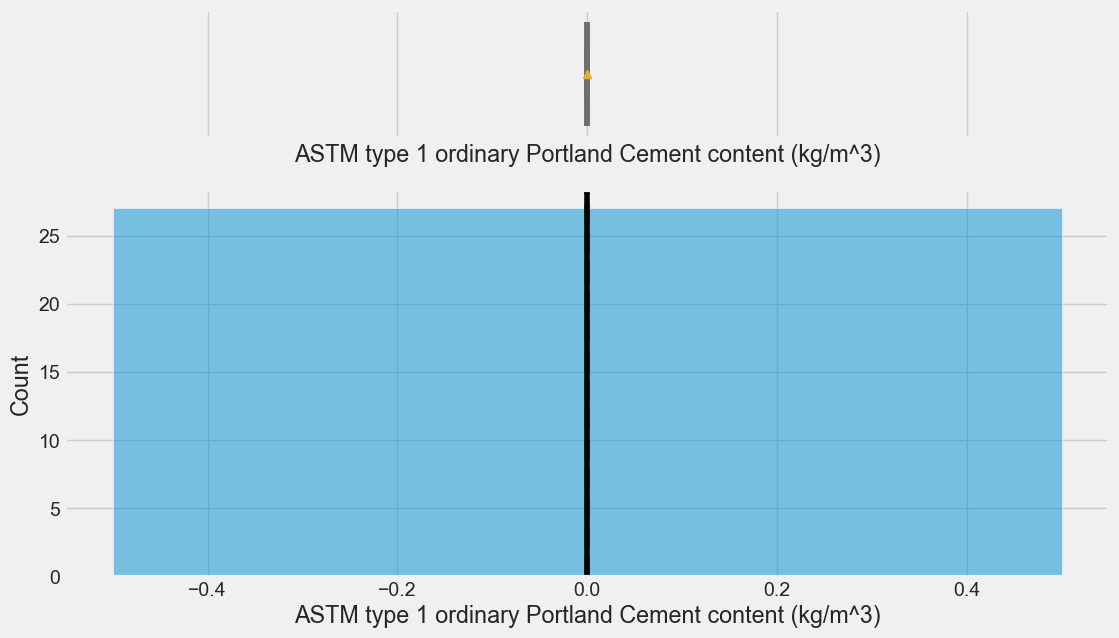

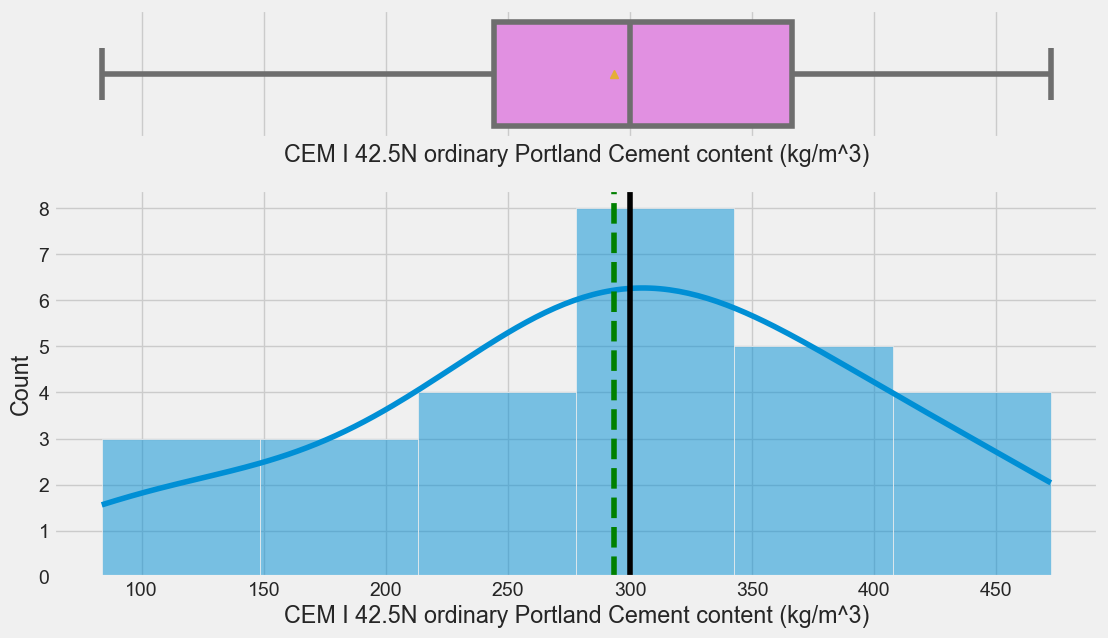

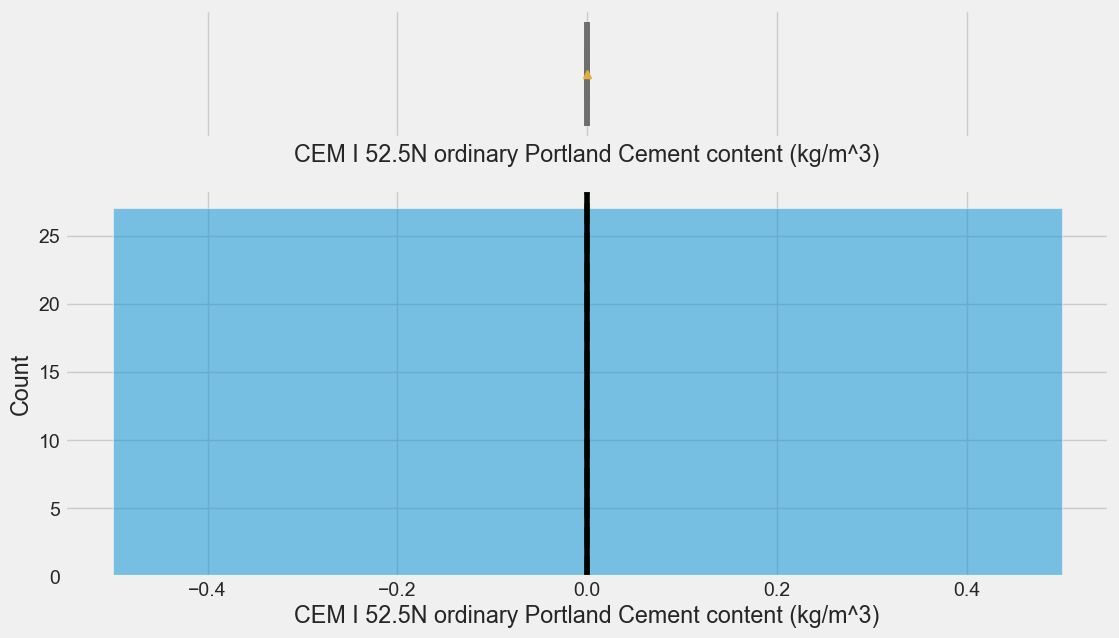

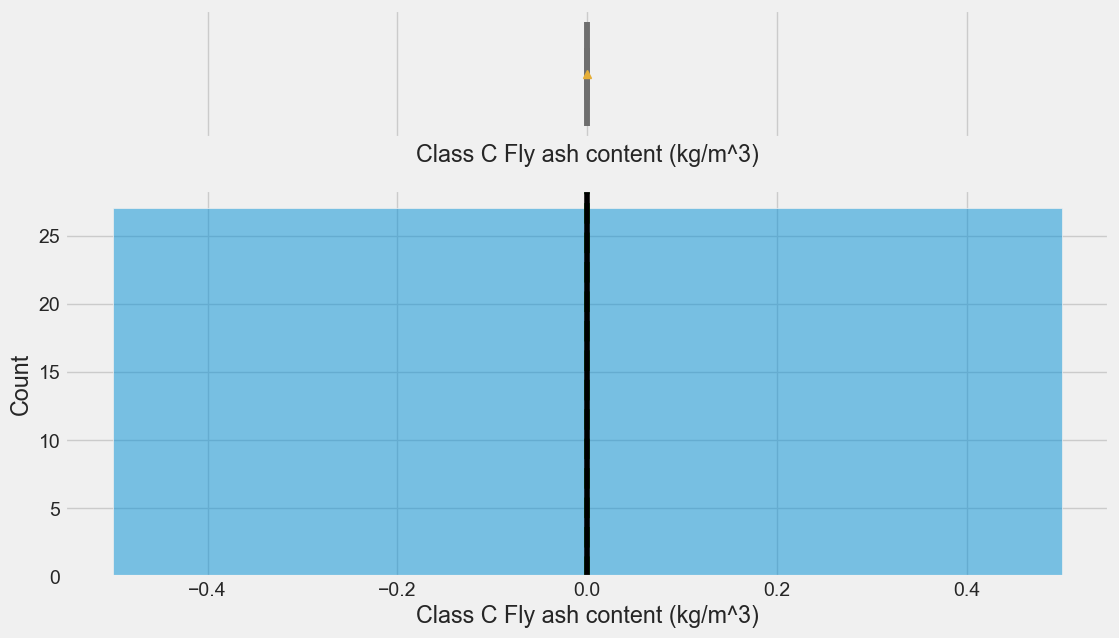

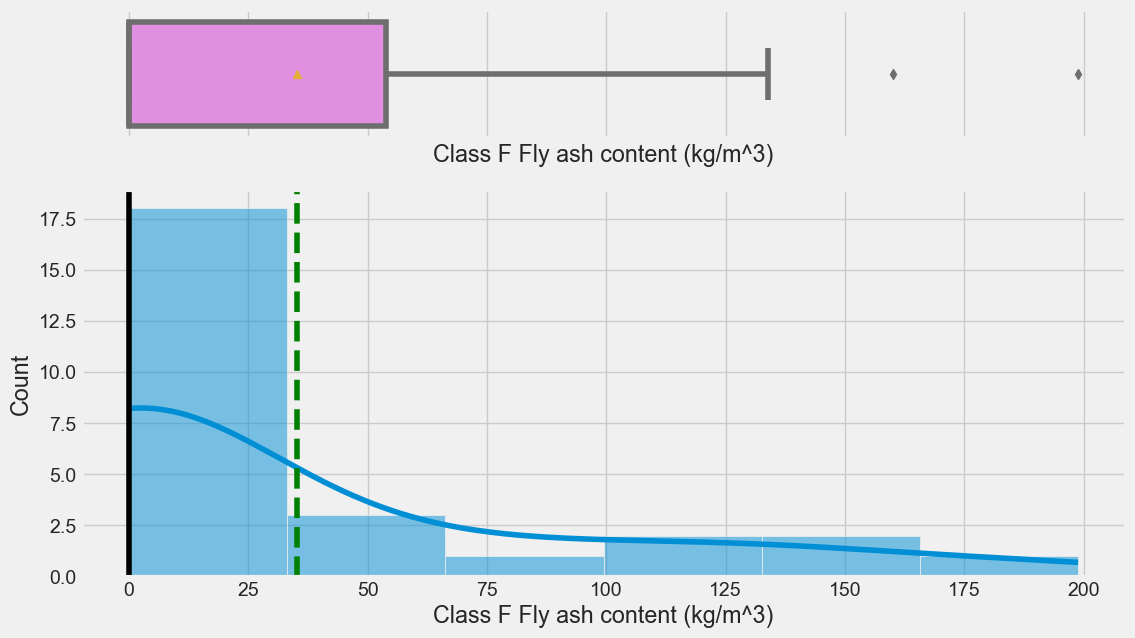

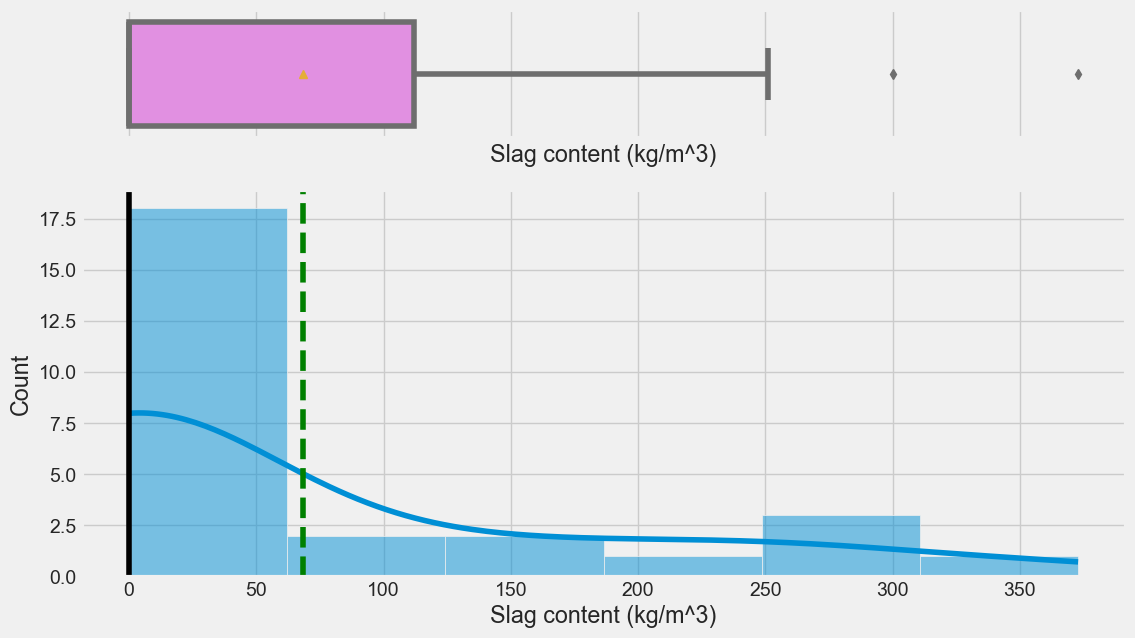

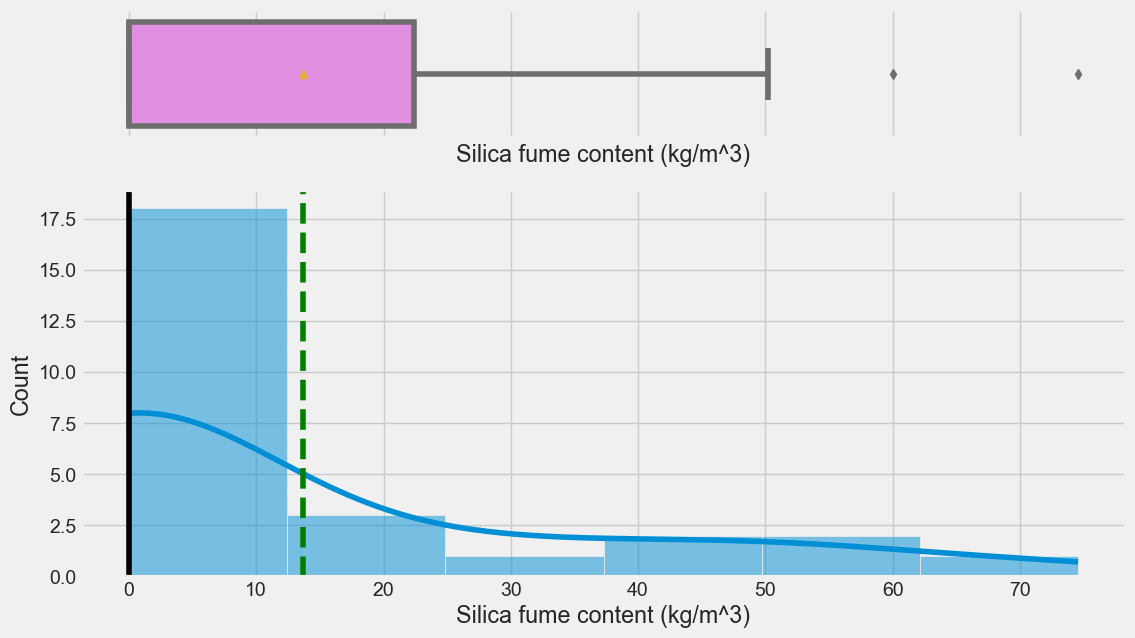

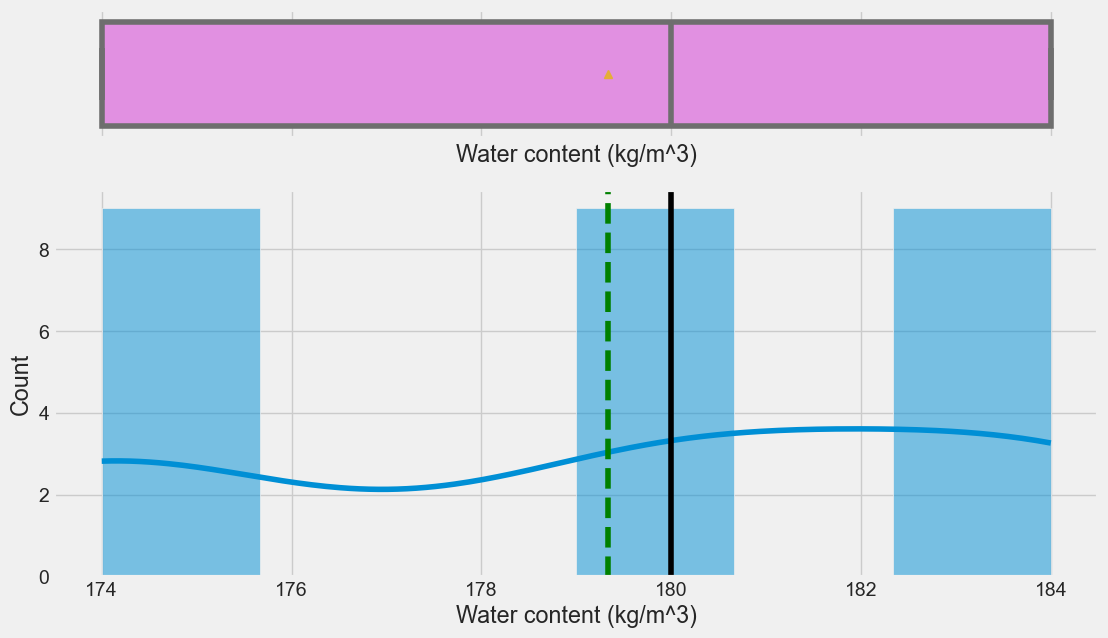

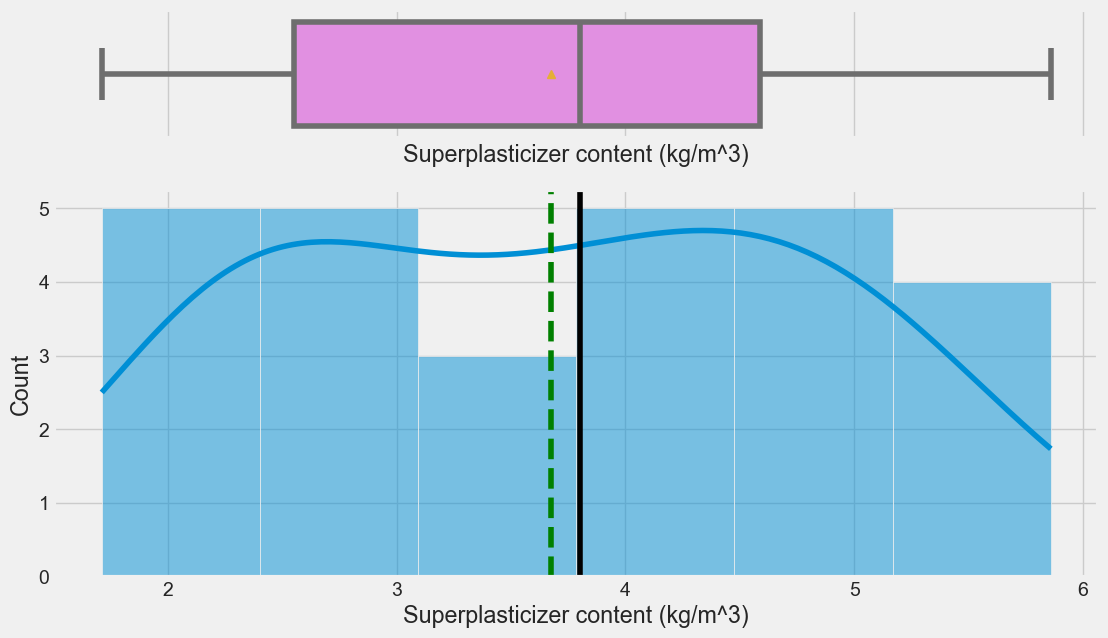

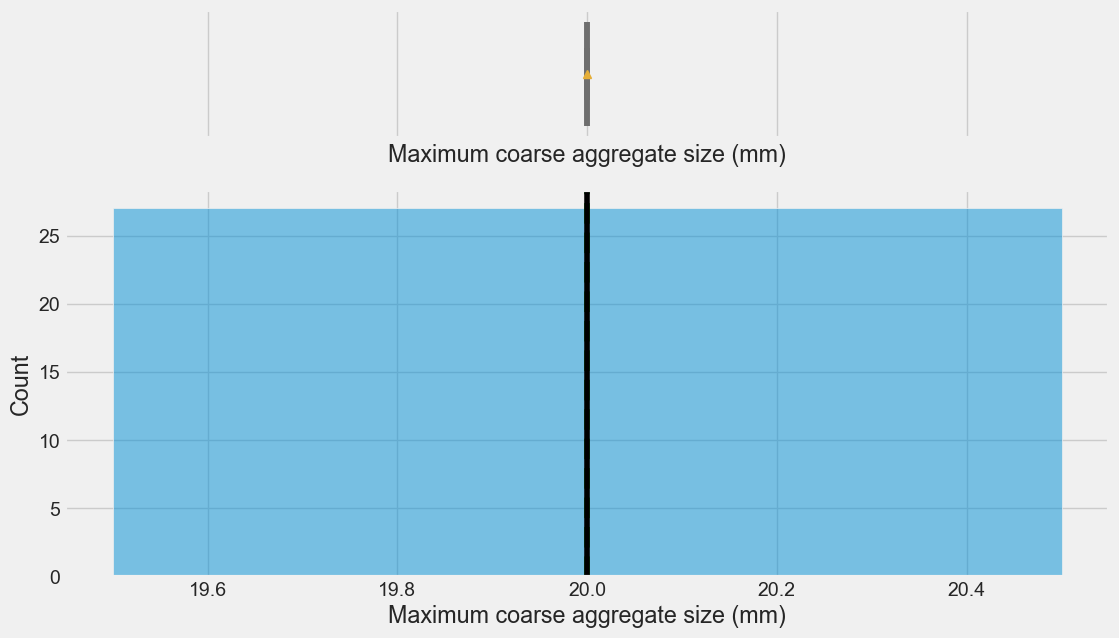

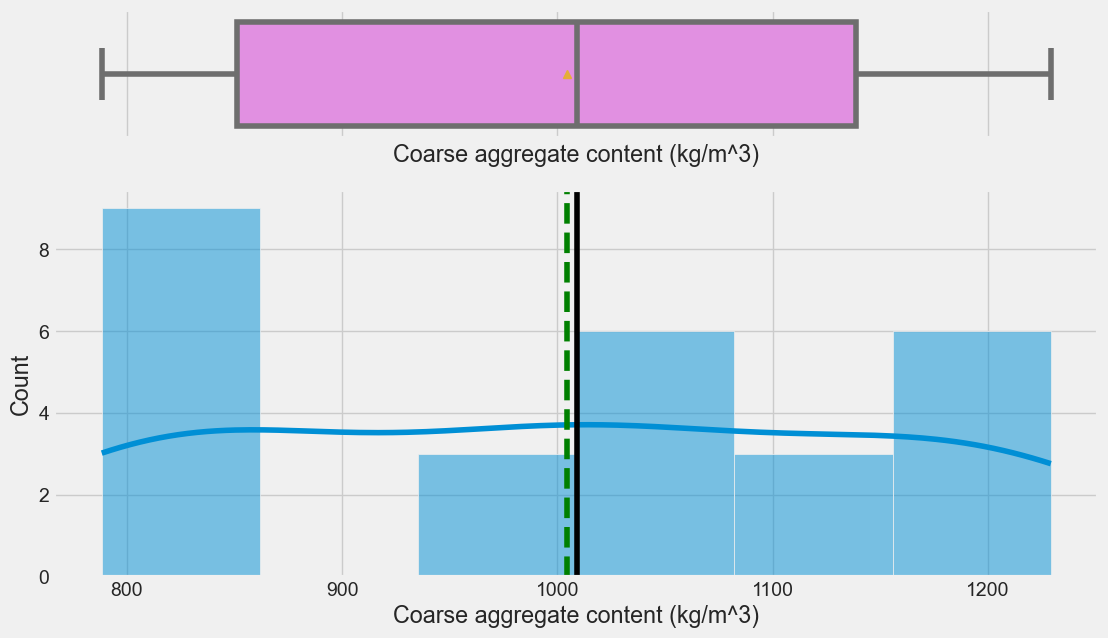

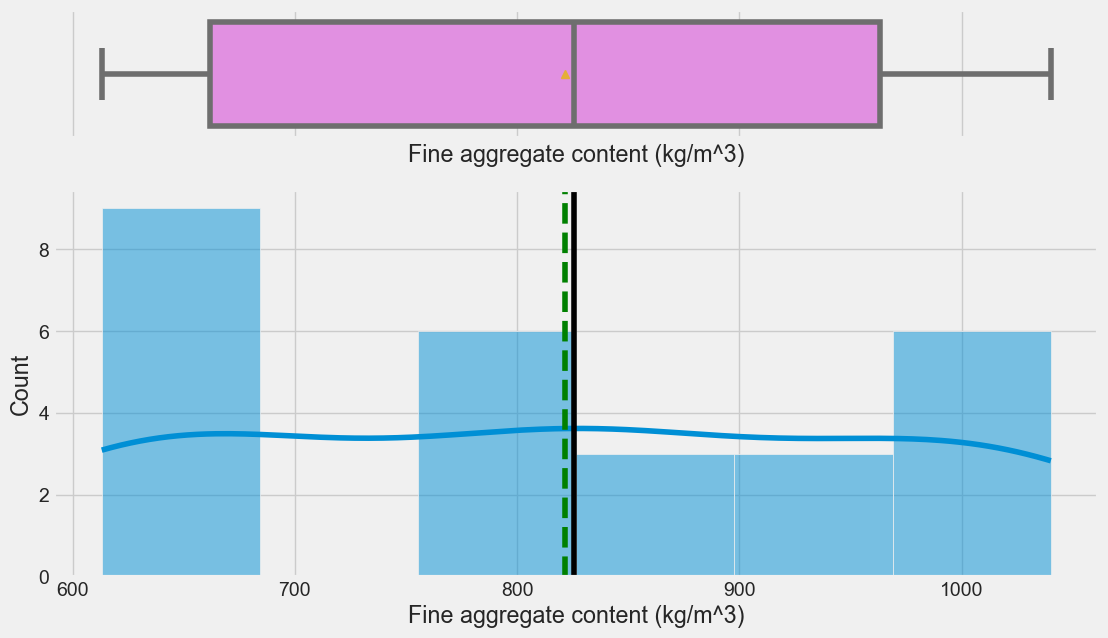

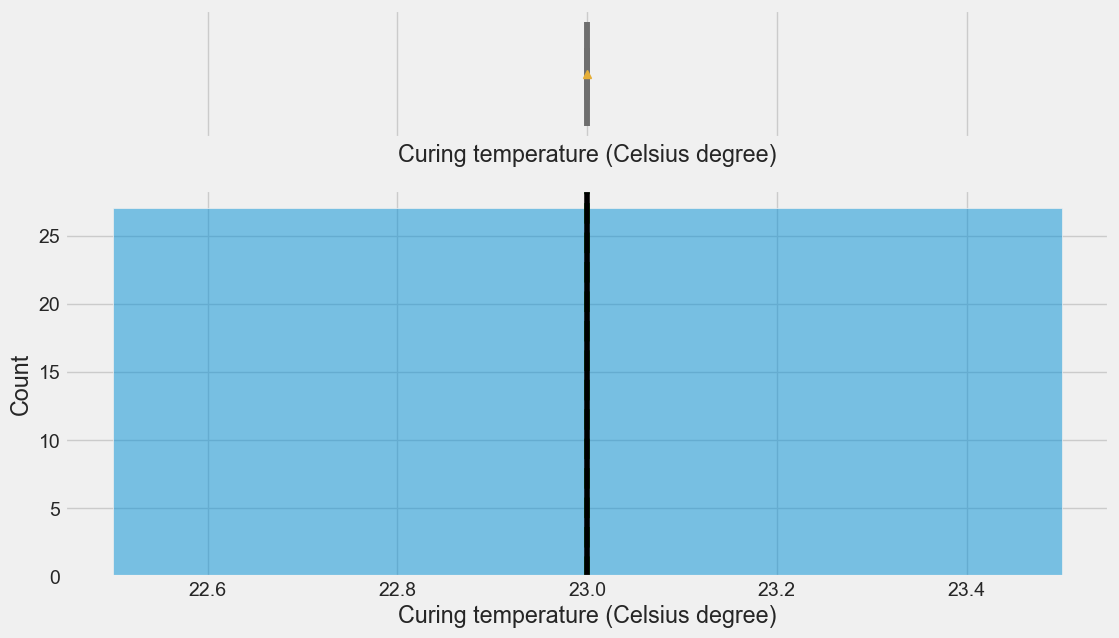

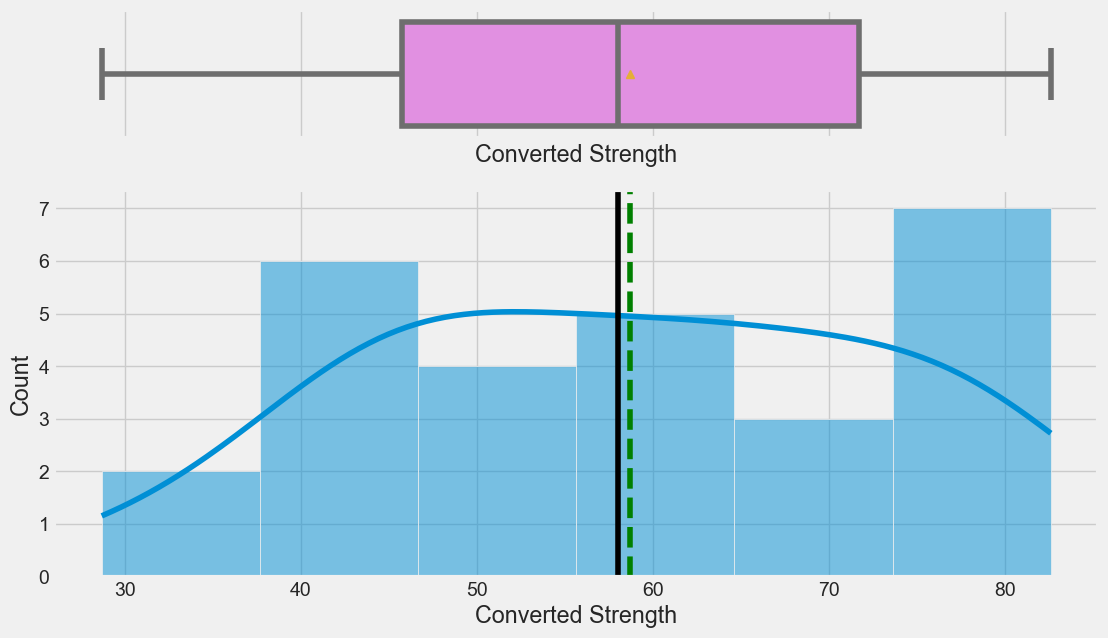

In [51]:
for col in num.columns:
    hist_boxplot(num, col)

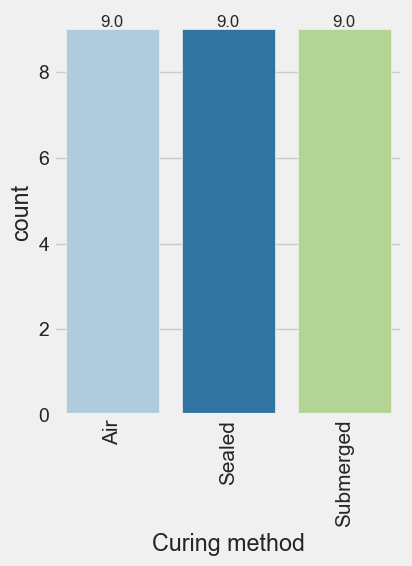

In [52]:
for col in obj.columns:
    labeled_barplot(obj, col)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


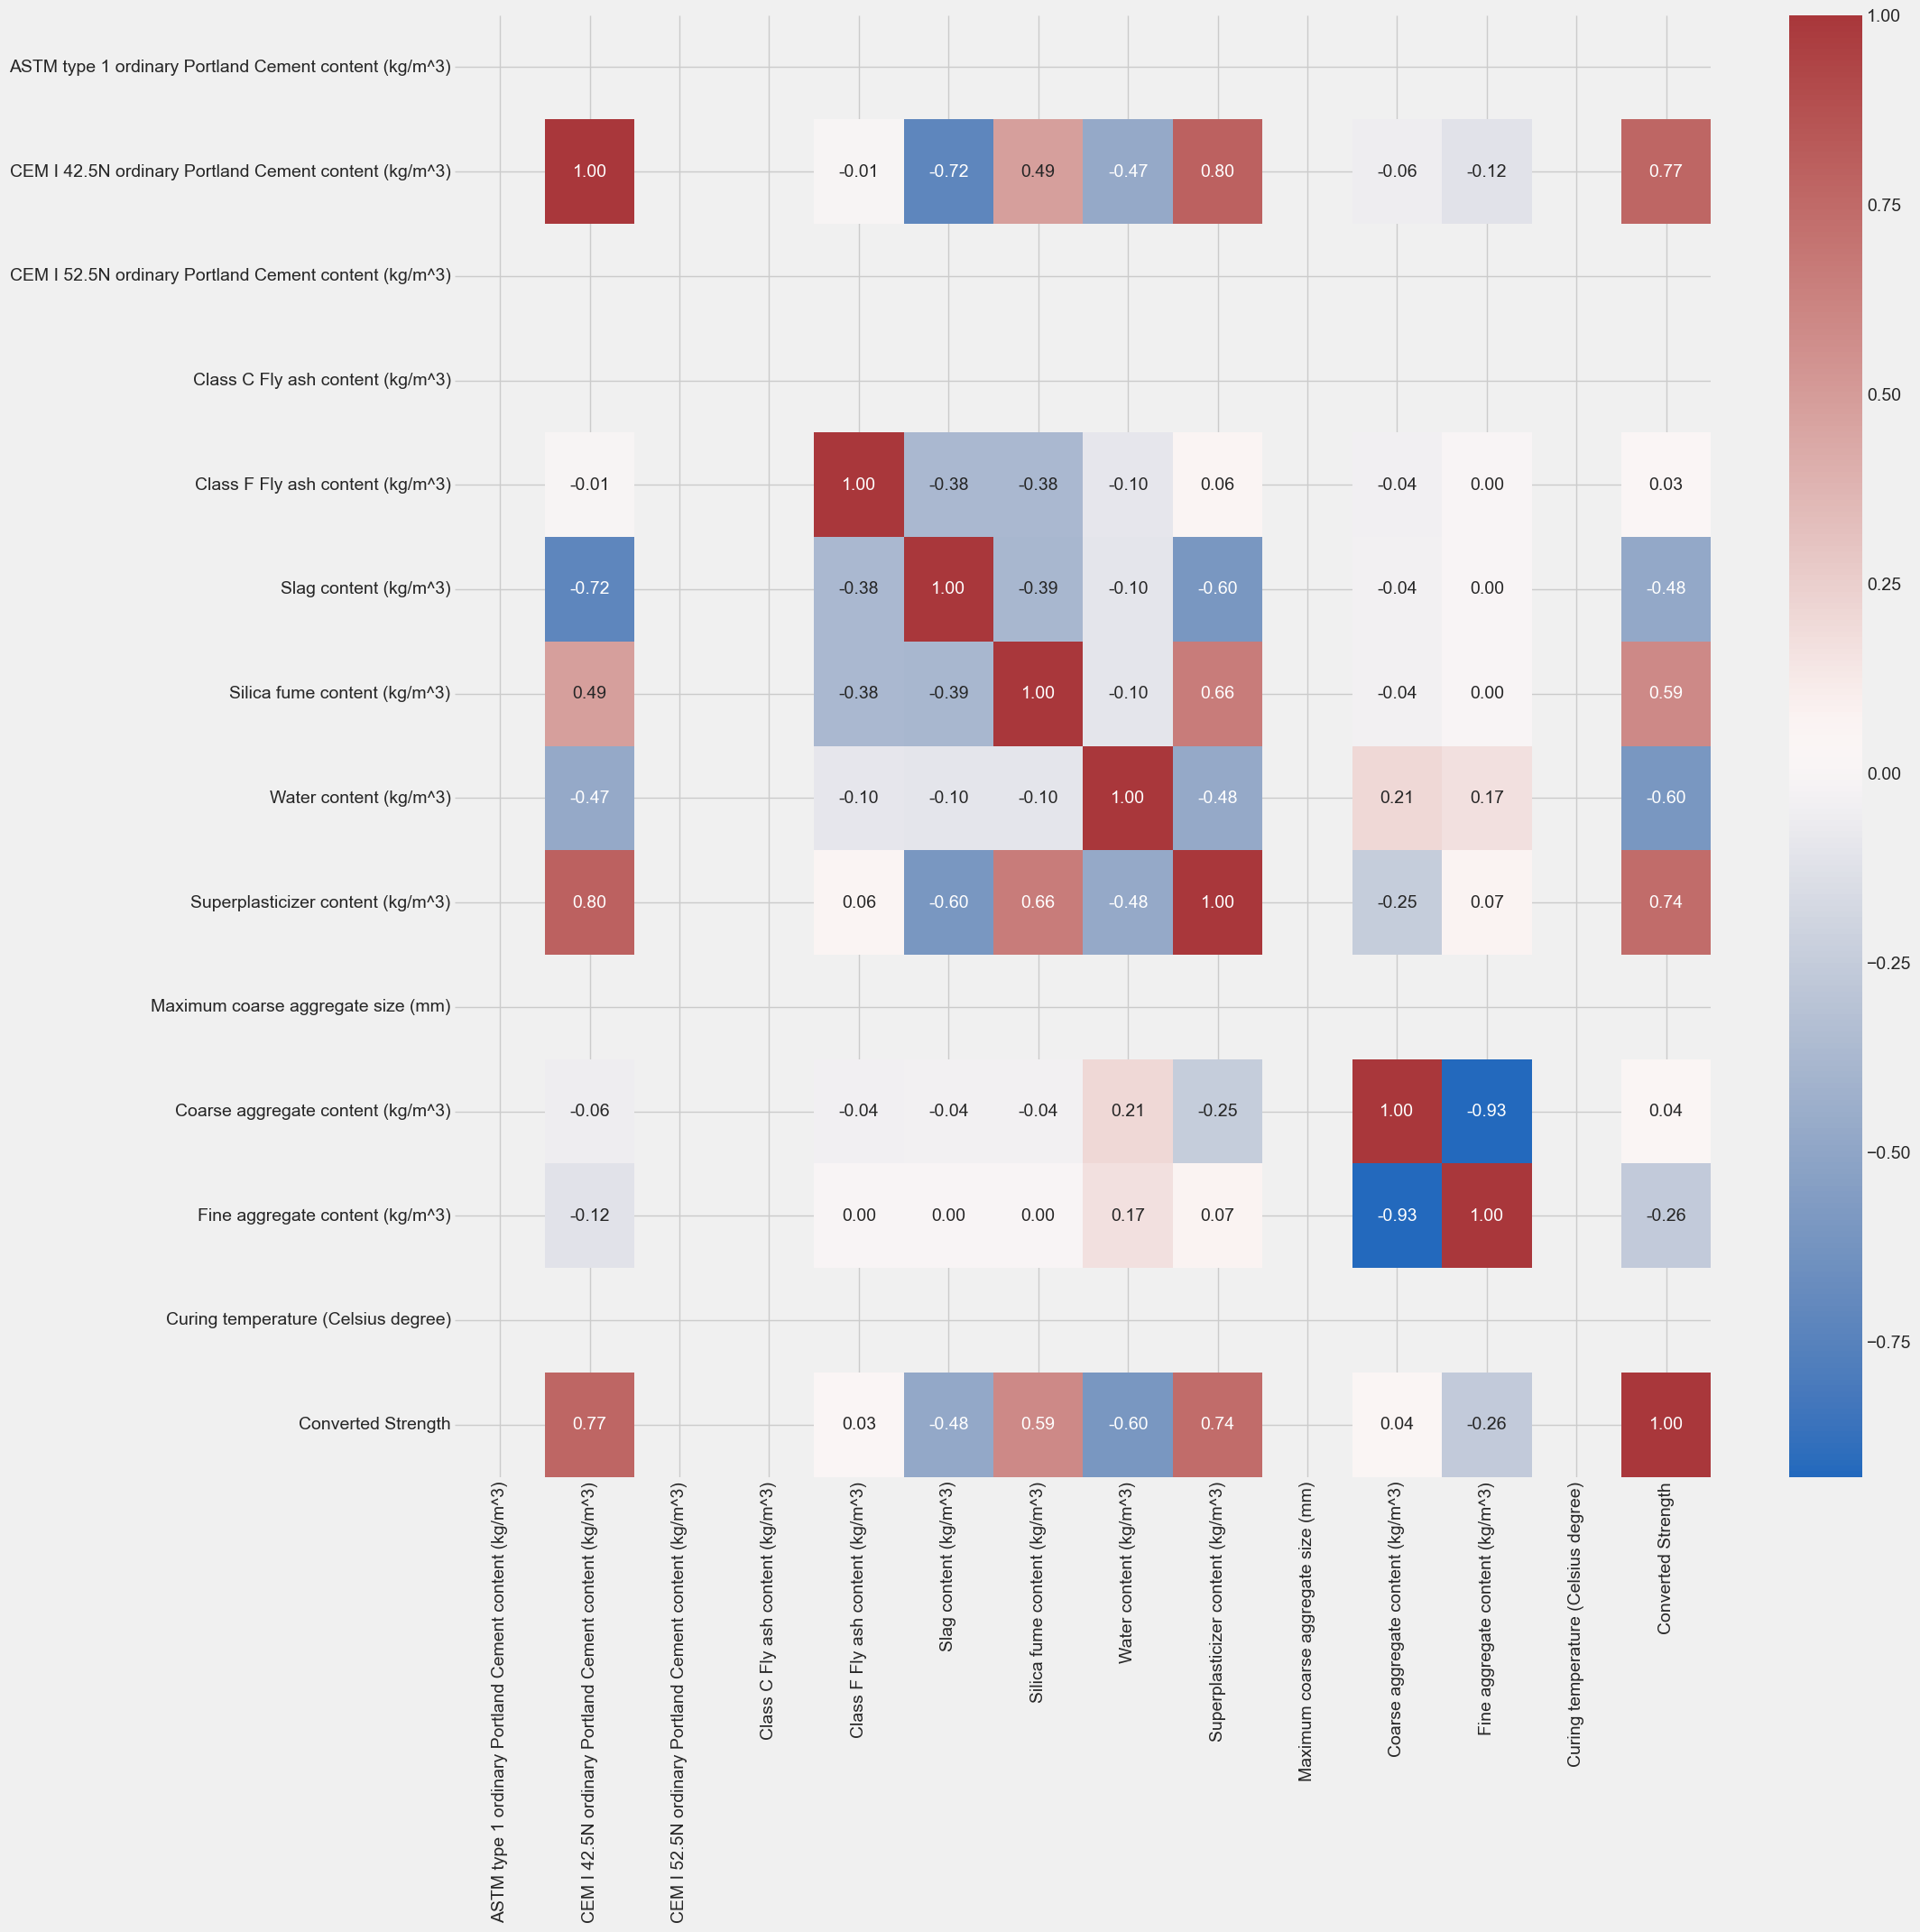

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, fmt='.2f', cmap = 'vlag')
plt.show()

In [54]:
data['Curing method'] = data['Curing method'].map(curing_method)
data

ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                   0       
1                                                   0       
2                                                   0       
3                                                   0       
4                                                   0       
5                                                   0       
6                                                   0       
7                                                   0       
8                                                   0       
9                                                   0       
10                                                  0       
11                                                  0       
12                                                  0       
13                                                  0       
14                                                  0       
15                                                  0       
16                                                  0       
17                                                  0       
18                                                  0       
19                                                  0       
20                                                  0       
21                                                  0       
22                                                  0       
23                                                  0       
24                                                  0       
25                                                  0       
26                                                  0       

    CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                             352.000       
1                                             447.429       
2                                             300.000       
3                                             317.818       
4                                             360.000       
5                                             300.000       
6                                             472.286       
7                                             372.857       
8                                             200.727       
9                                             200.000       
10                                            284.364       
11                                            372.857       
12                                            250.909       
13                                            437.486       
14                                            294.400       
15                                            124.286       
16                                            167.273       
17                                            340.000       
18                                            422.571       
19                                            240.000       
20                                            248.571       
21                                            301.091       
22                                            298.286       
23                                            250.909       
24                                            100.000       
25                                            380.000       
26                                             83.636       

    CEM I 52.5N ordinary Portland Cement content (kg/m^3)  \
0                                                   0       
1                                                   0       
2                                                   0       
3                                                   0       
4                                                   0       
5                                                   0       
6                                                   0       
7                                                   0       
8                                    

In [58]:
xg = models[4][1]

In [56]:
X_lab = data.drop(['Converted Strength'], axis= 1)
y_lab = data['Converted Strength']

In [59]:
pred_scores = []

score = cross_val_score(xg, X_lab, y_lab, cv = rkf, n_jobs=-1)
pred_scores.append(score)

mean_score = mean(pred_scores)

print(mean_score)

-0.1959500870346956


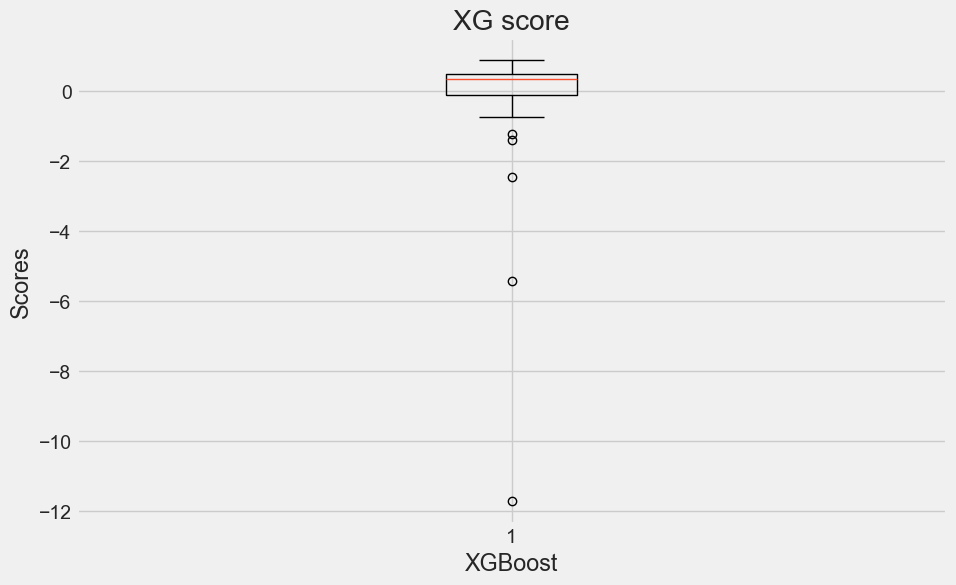

In [62]:
# Extract model names and scores for plotting
model_name = 'XG'
score = pred_scores

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(score)
plt.xlabel('XGBoost')
plt.ylabel('Scores')
plt.title('XG score')
plt.show()